<h1><center> Time Series</center></h1>
<h2><center> By: Amr Mohamed </center></h2>

### Table of contents:
* 1 Basic concepts in Time Series
    * 1.1 From White Noise to ACF plots
    * 1.2 ARMA models
* 2 Forecasting competition on Kaggle
* 3 Forecasting with Prophet
    * 3.1 Introduction to forecasting with Prophet
    * 3.2 Multiple Time Series Demand Forecasting Challenge with Prophet
* 4 Fourier Transform
    * 4.1 Introduction to Fourier Transform
    * 4.2 Fast Fourier Transform Forecasting Model (FFT) with Darts
* 5 From shapelet mining to discord detection
    * Motif Detection
    * Disctord Detection
    * Time Series Segmentation
* 6 Bonus on Deep Learning (RNNs)
    * 6.1 Introduction to Recurrent Neural Networks Models with LSTM using Darts
    * 6.2 Exponential Smoothing using Darts

In [354]:
# ARIMA and kaggle competiton
from random import gauss
from random import seed
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from random import random
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import numpy as np
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
import pmdarima as pm
from sktime.datasets import load_airline

# FB prophet
from prophet import Prophet
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

# Matrix profile 
import matrixprofile as mp
from matrixprofile.visualize import plot_discords_mp
from tssb.utils import visualize_time_series,load_time_series_segmentation_datasets, relative_change_point_distance
from sktime.annotation.clasp import ClaSPSegmentation
from tssb.utils import visualize_time_series

# RNN
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.datasets import ETTh2Dataset
from darts.ad import KMeansScorer
from darts.ad import QuantileDetector
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from utils import fix_pythonpath_if_working_locally
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)
from time import time
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")
sns.set_theme()

# 1 Basic concepts in Time Series

## 1.1 From White Noise to ACF plots

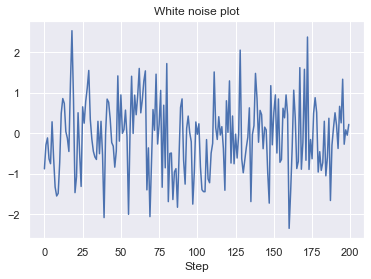

In [207]:
# 1 create white noise series for 200 observations
mean = 0
std = 1 
num_samples = 200
samples = np.random.normal(mean, std, size=num_samples)
# plotting the white noise
plt.plot(samples)
plt.xlabel('Step')
plt.title('White noise plot')
plt.show()

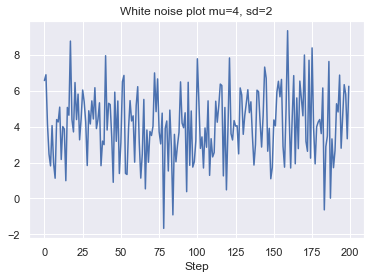

In [208]:
seed(1)
# 2 create white noise series for 200 observations  with mean = 4, sd = 2
series = [gauss(4, 2) for i in range(200)]
series = Series(series)
# line plot
series.plot()
plt.xlabel('Step')
plt.title('White noise plot mu=4, sd=2')
plt.show()

In [209]:
# using the arima function to estimate the parameters
# fit model
model = ARIMA(series, order=(1,0,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -415.817
Date:                Tue, 24 Jan 2023   AIC                            837.633
Time:                        23:53:23   BIC                            847.528
Sample:                             0   HQIC                           841.638
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1116      0.137     30.060      0.000       3.844       4.380
ar.L1         -0.0083      0.089     -0.094      0.925      -0.183       0.166
sigma2         3.7445      0.383      9.768      0.0

 3. Explain with your own words what a random walk is (minimum 100 words). Explain with your own words what stationarity means for a time series:<br>
Random walk: A random walk is a sequence of data points that are generated randomly, with no clear pattern or direction. The idea is that the current value of a time series is determined by the previous value, plus some random deviation. In other words, the next point in the time series is determined by the current point, plus a random "step" in some direction.
A simple example of a random walk in time series is a coin flip. If you flip a coin repeatedly, the sequence of heads and tails can be thought of as a random walk. Each coin flip is determined by the previous flip, but the outcome is random and unpredictable.
Stationarity: A time series is said to be stationary if its data distribution doesn't change over time. For a ts to be stationary it has to fullfil: 
    * trend is zero
    * has constant variance
    * autocorrelation is contatnt (each value of the ts is related equally to the neighbours)
    


In [210]:
#4  Create a random walk series, plot it, calculate the first difference series and plot it

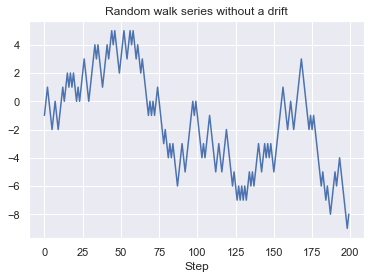

In [211]:
# seed(1)
random_walk = list()
# generate a random walk with probabilty 50/50 of 200 steps
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 200):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
#plot the random walk
plt.plot(random_walk)
plt.xlabel('Step')
plt.title('Random walk series without a drift')
plt.show()

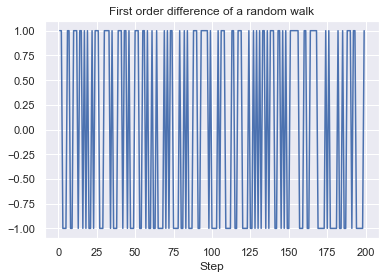

In [212]:
# create and plot the differenced random walk
pd.Series(random_walk).diff().plot()
plt.xlabel('Step')
plt.title('First order difference of a random walk')
plt.show()

In [213]:
print('First 10 steps of the first order differenced values of the random walk')
pd.Series(random_walk).diff().head(10)

First 10 steps of the first order differenced values of the random walk


0    NaN
1    1.0
2    1.0
3   -1.0
4   -1.0
5   -1.0
6    1.0
7    1.0
8   -1.0
9   -1.0
dtype: float64

Adding a drift to the random walk above

In [214]:
#5. Generate WN drift data, convert it to a random walk and plot it
walk = [25]

for i in range(200):
    # Create white noise
    noise = -1 if np.random.random() < 0.5 else 1
    # Add the drift
    walk.append(walk[-1] + noise)

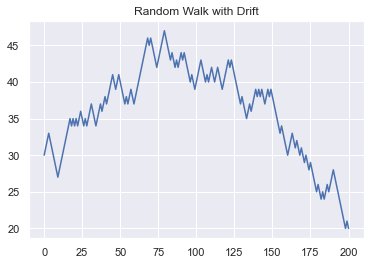

In [215]:
# coverting the drifty white noise to a random walk
drift = 5
drifty_walk = pd.Series(walk) + drift

drifty_walk.plot(title="Random Walk with Drift");

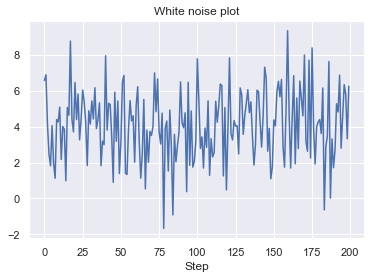

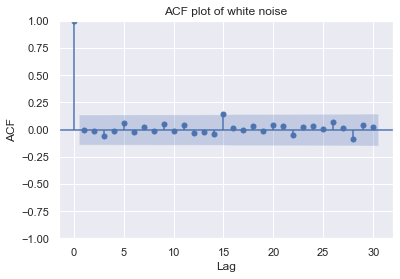

In [216]:
# 6. Plot the ACF on the white noise

#plotting the white nois
plt.plot(series)
plt.xlabel('Step')
plt.title('White noise plot')
plt.show()
sm.graphics.tsa.plot_acf(series,lags=30)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('ACF plot of white noise')
plt.show()

The ACF of a white noise process is characterized by the property that all the lags are independent of each other. This means that the correlation between any two points in the time series is zero, regardless of how far apart they are as shown in the figure above

In [217]:
#perform Ljung-Box test
print(sm.stats.acorr_ljungbox(series, lags=[30], return_df=True))

    lb_stat  lb_pvalue
30   13.442   0.996004


From the Ljung-Box test above, we fail to reject the null hypothesis that the series is a white noise due to the extremely high p-values.

## 1.2 ARMA models

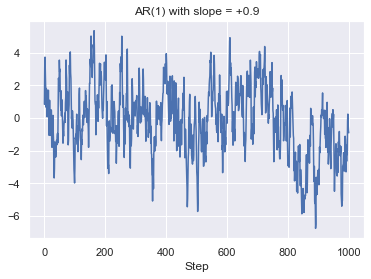

In [240]:
#7
# Simulate AR(1) parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
# simulated_data_1 = AR_object1.generate_sample(nsample=1000)
simulated_data_1 = arma_generate_sample(ar1, ma1, 1000)

# Plot simulated data
plt.title("AR(1) with slope = +0.9")
plt.xlabel("Step")
plt.ylabel("")
plt.plot(simulated_data_1)
plt.show()

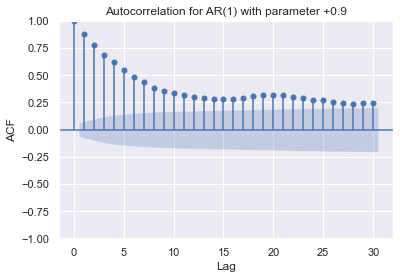

In [241]:
# Plot ACF AR(1) parameter = +0.9
plot_acf(np.array(simulated_data_1), title = "Autocorrelation for AR(1) with parameter +0.9")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

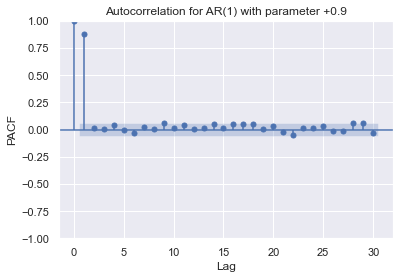

In [242]:
# Plot PACF AR(1) parameter = +0.9
plot_pacf(np.array(simulated_data_1), title = "Autocorrelation for AR(1) with parameter +0.9")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

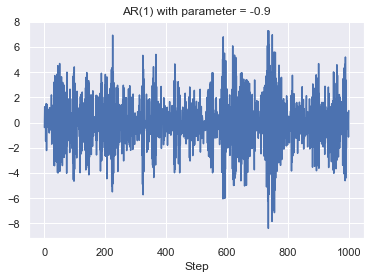

In [243]:
# Simulate AR(1) parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)

# Plot simulated data
plt.title("AR(1) with parameter = -0.9")
plt.xlabel("Step")
plt.ylabel("")
plt.plot(simulated_data_2)
plt.show()

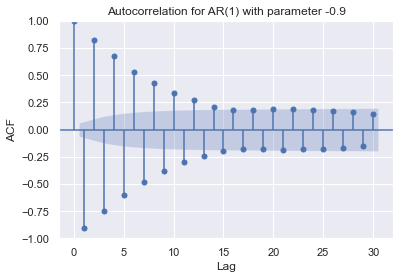

In [244]:
# Plot ACF AR(1) parameter = -0.9
plot_acf(np.array(simulated_data_2), title = "Autocorrelation for AR(1) with parameter -0.9")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

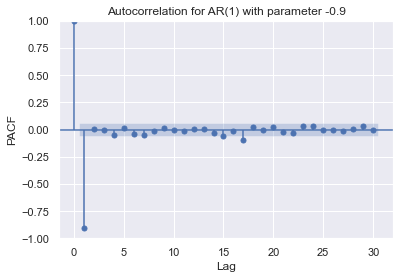

In [245]:
# Plot PACF AR(1) parameter = -0.9
plot_pacf(np.array(simulated_data_2), title = "Autocorrelation for AR(1) with parameter -0.9")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

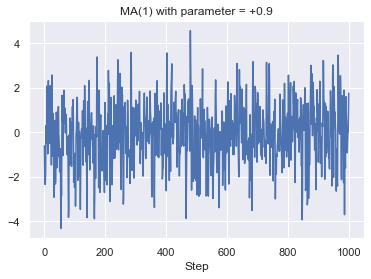

In [246]:
# Simulate MA(1) parameter = +0.9
ar1 = np.array([1])
ma1 = np.array([1, 0.9])
MA_object1 = ArmaProcess(ar1, ma1)

# Plot simulated data
plt.title("MA(1) with parameter = +0.9")
plt.xlabel("Step")
plt.ylabel("")
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);

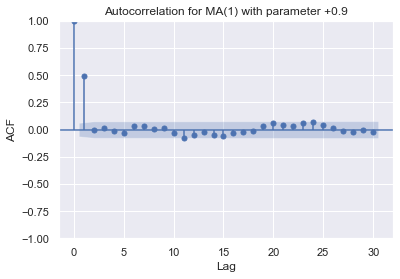

In [247]:
# Plot ACF MA(1) parameter = +0.9
plot_acf(np.array(simulated_data_1), title = "Autocorrelation for MA(1) with parameter +0.9")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

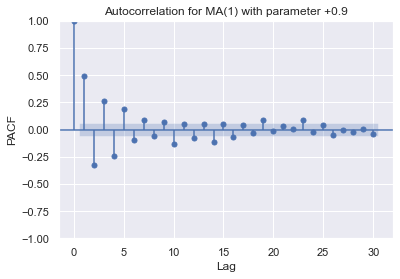

In [248]:
# Plot PACF MA(1) parameter = +0.9
plot_pacf(np.array(simulated_data_1), title = "Autocorrelation for MA(1) with parameter +0.9")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

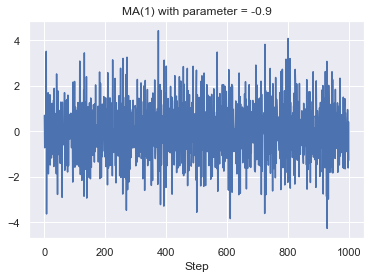

In [249]:
# Simulate MA(1) parameter = -0.9
ar2 = np.array([1])
ma2 = np.array([1, -0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)

# Plot simulated data
plt.title("MA(1) with parameter = -0.9")
plt.xlabel("Step")
plt.ylabel("")
plt.plot(simulated_data_2)
plt.show()

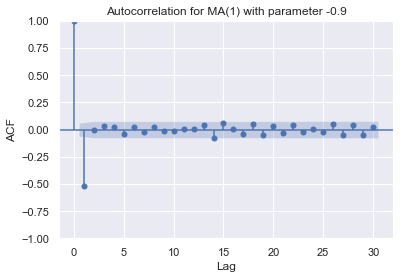

In [250]:
# Plot ACF MA(1) parameter = -0.9
plot_acf(np.array(simulated_data_2), title = "Autocorrelation for MA(1) with parameter -0.9")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

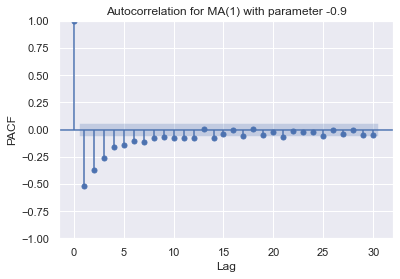

In [251]:
# Plot PACF MA(1) parameter = -0.9
plot_pacf(np.array(simulated_data_2), title = "Autocorrelation for MA(1) with parameter -0.9")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

The AR(1) process is when the current value is based on the immediately preceding value, while an AR(2) process  is when  the current value is based on the previous two values.

9. What is the difference between an Autocorrelation Function and a Partial
autocorrelation Function ?

    ACF is a measure of the correlation between a time series and a lagged version of itself. It gives us a sense of how strongly the current value of the time series is related to its past values. The ACF plot shows the correlation between the time series and lags of itself at increasing time intervals.
PACF, on the other hand, is used to measure the correlation between a time series and a lagged version of itself, controlling for the correlation of intermediate lags. It gives us a sense of how strongly the current value of the time series is related to its past values, while taking into account the effects of any intermediate lags. The PACF plot shows the correlation between the time series and lags of itself at increasing time intervals, while controlling for any intermediate lags.

In [230]:
from statsmodels.tsa.arima_process import ArmaProcess

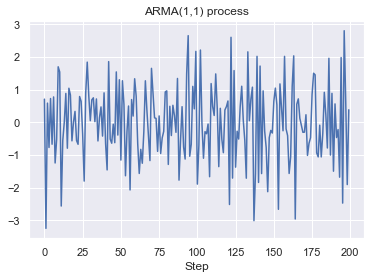

In [253]:
#10  Plot the ACF and the PACF of an AR, a MA, and ARMA models. What are the main differences ?
# we can find the relevant plots of AR and MA in question 8

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.7])
length = 200   
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=length)
# Plot simulated data
plt.title("ARMA(1,1) process")
plt.xlabel("Step")
plt.ylabel("")
plt.plot(ret)
plt.show()

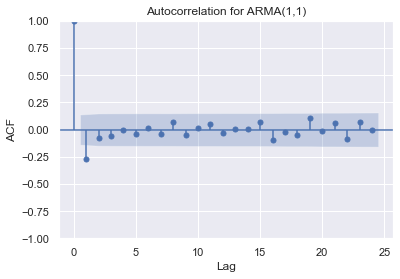

In [255]:
# Plot ACF ARMA(1,1)
plot_acf(ret, title = "Autocorrelation for ARMA(1,1)")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

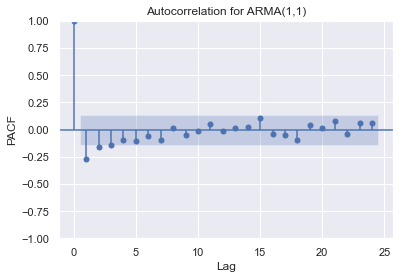

In [256]:
# Plot PACF ARMA(1,1) 
plot_pacf(ret, title = "Autocorrelation for ARMA(1,1)")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

In an AR model, the correlation between the current value of the series and a value some lags ago is modeled. The ACF of an AR model shows a strong correlation for the first few lags, then the correlation gradually decreases. The PACF shows a strong correlation for the first lag, then a decline for the next lags.

In a MA model, the current value of the series is modeled as a linear combination of past errors or residuals. The ACF of a MA model shows a strong correlation for the first lag, then the correlation gradually decreases. The PACF shows a decline for all lags except a strong correlation with the first lag.

In an ARMA model, both the AR and MA components are present. The ACF and PACF of an ARMA model shows characteristics of both AR and MA models. The ACF and PACF show similar behaviour of strong declination in correlation after the first lag

11. Write the equation of an ARMA model:

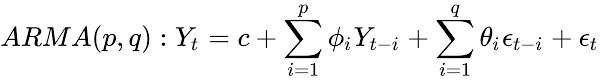

12. What are the main differences between AIC and BIC criteria, conceptually speaking ?

    AIC is metric for measuring the goodness of fit of a model. A model which makes better predictions
is given a lower AIC score. The AIC also penalizes models which have lots of parameters. This
means if we set the order too high compared to the data, we will get a high AIC value. This stops us
overfitting to the training data.
Same as AIC, BIC is metric for measuring the goodness of fit of a model. Models which fit the data
better have lower BICs and the BIC penalizes overly complex models.
For both of these metrics a lower value suggests a better model. The difference between these two
metrics is how much they penalize model complexity. The BIC penalizes additional model orders
more than AIC and so the BIC will sometimes suggest a simpler model. The AIC and BIC will often
choose the same model, but when they don't we will have to make a choice. If our goal is to identify
good predictive models, we should use AIC. However if our goal is to identify a good explanatory
model (more interpretable), we should use BIC

# 2 Forecasting competition on Kaggle

In [145]:
# Importing the data
train = pd.read_csv('.//..//Datasets//Kaggle competition//sales_train.csv')
test = pd.read_csv('.//..//Datasets//Kaggle competition//test.csv')
shops = pd.read_csv('.//..//Datasets//Kaggle competition//shops.csv')
items = pd.read_csv('.//..//Datasets//Kaggle competition//items.csv')
item_cat = pd.read_csv('.//..//Datasets//Kaggle competition//item_categories.csv')

Data preview

In [146]:
test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [147]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [148]:
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [149]:
item_cat.head()

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

## Data processing

In [152]:
# converting dates from strings to datetime format
train['date']= pd.to_datetime(train["date"], format="%d.%m.%Y")

In [153]:
#1 Selecting the product id = 20949 
train_20949 = train[train.item_id==20949]
train_20949.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
352379 2013-04-30               3       22    20949    5.000000          12.0
352399 2013-04-29               3       22    20949    4.923077          13.0
352400 2013-04-28               3       22    20949    5.000000           4.0
352401 2013-04-27               3       22    20949    5.000000           4.0
352455 2013-04-24               3       22    20949    5.000000           2.0

In [154]:
#2 shifting the data to get the column values of the ts at lag 1
train_20949_lag1 = train_20949.shift(1)
#3 join the two datasets, and look at them using the head command
train_20949_wz_lag1= pd.concat([train_20949,train_20949.shift(1).iloc[: , 1:].rename(columns={"date_block_num": "date_block_num_l1", "shop_id": "shop_id_l1", "item_id": "item_id_ltrain_20949_wz_lag11", "item_price": "item_price_l1", "item_cnt_day": "item_cnt_day_l1"})],axis=1)
train_20949_wz_lag1.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
352379 2013-04-30               3       22    20949    5.000000          12.0   
352399 2013-04-29               3       22    20949    4.923077          13.0   
352400 2013-04-28               3       22    20949    5.000000           4.0   
352401 2013-04-27               3       22    20949    5.000000           4.0   
352455 2013-04-24               3       22    20949    5.000000           2.0   

        date_block_num_l1  shop_id_l1  item_id_ltrain_20949_wz_lag11  \
352379                NaN         NaN                            NaN   
352399                3.0        22.0                        20949.0   
352400                3.0        22.0                        20949.0   
352401                3.0        22.0                        20949.0   
352455                3.0        22.0                        20949.0   

        item_price_l1  item_cnt_day_l1  
352379            NaN              NaN  
352399       5.000000             12.0  
352400       4.923077             13.0  
352401       5.000000              4.0  
352455       5.000000              4.0

In [155]:
train_20949_wz_lag1=train_20949_wz_lag1.drop(columns=["item_id","item_id_ltrain_20949_wz_lag11"])
train_20949_wz_lag1.head()

date  date_block_num  shop_id  item_price  item_cnt_day  \
352379 2013-04-30               3       22    5.000000          12.0   
352399 2013-04-29               3       22    4.923077          13.0   
352400 2013-04-28               3       22    5.000000           4.0   
352401 2013-04-27               3       22    5.000000           4.0   
352455 2013-04-24               3       22    5.000000           2.0   

        date_block_num_l1  shop_id_l1  item_price_l1  item_cnt_day_l1  
352379                NaN         NaN            NaN              NaN  
352399                3.0        22.0       5.000000             12.0  
352400                3.0        22.0       4.923077             13.0  
352401                3.0        22.0       5.000000              4.0  
352455                3.0        22.0       5.000000              4.0

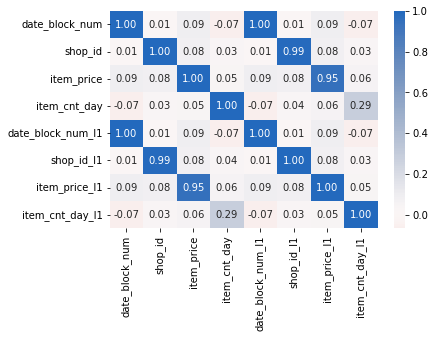

In [159]:
# 4. investingating columns correlation
sns.heatmap(train_20949_wz_lag1.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

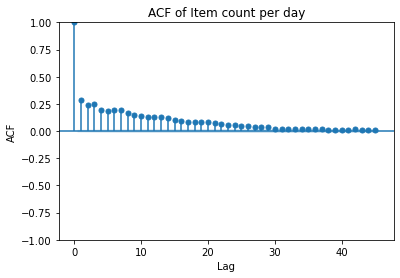

In [161]:
# Calculate the ACF of item count per day
plot_acf(train_20949_wz_lag1['item_cnt_day'])
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('ACF of Item count per day');

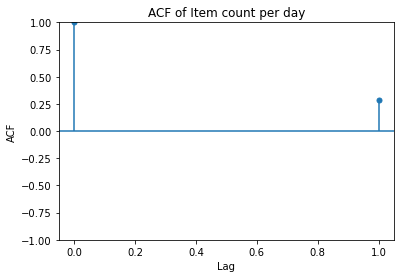

In [162]:
plot_acf(train_20949['item_cnt_day'], lags=1);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('ACF of Item count per day');

From the ACF plot above, we can see that the time time series is has a correlation value of approximately 0.3, which we can verify from the correlation matrix above.

In [163]:
# selecting only the time and count of items per day which is the variable of interest
train_20949 = train[train.item_id==20949][['date','item_cnt_day']]
train_20949.head()

date  item_cnt_day
352379 2013-04-30          12.0
352399 2013-04-29          13.0
352400 2013-04-28           4.0
352401 2013-04-27           4.0
352455 2013-04-24           2.0

In [164]:
# grouped item counts over all the stores for each day
train_20949 = train_20949.groupby('date').sum()
train_20949.head()

item_cnt_day
date                    
2013-04-24           8.0
2013-04-25          25.0
2013-04-26          43.0
2013-04-27          38.0
2013-04-28          38.0

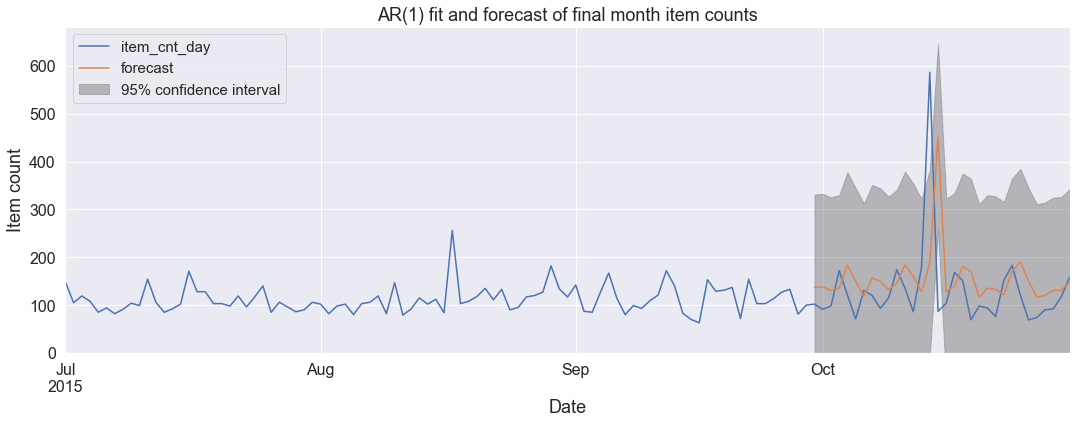

In [363]:
# 5. Fit and plot an auto-regressive model to the time series.
ar1 = ARIMA(train_20949, order=(1,0,0)).fit()
fig, ax = plt.subplots(figsize=(18,6))
# selecting data starting from 7/2015
ax = train_20949.loc['2015-07-01':].plot(ax=ax)
# testing the model on the last month of the data
plot_predict(ar1, '2015-09-30', '2015-10-31', ax=ax)
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('AR(1) fit and forecast of final month item counts', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=15)
plt.show()

In [364]:
# check here intercept and var of innovation
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(train_20949['item_cnt_day'], lags=3)
res_fit = res.fit()
res_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                     AutoReg(3)   Log Likelihood               -5510.183
Method:               Conditional MLE   S.D. of innovations             97.850
Date:                Wed, 25 Jan 2023   AIC                          11030.367
Time:                        03:29:42   BIC                          11054.478
Sample:                    04-27-2013   HQIC                         11039.569
                         - 10-31-2015                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              56.4428      6.784      8.320      0.000      43.147      69.739
item_cnt_day.L1     0.5561      0.033     16.988      0.000       0.492       0.620
item_cnt_day.L2     0.0409      0.038      1.090      0.276      -0.033       0.114
item_cnt_day.L3     0.1274      0.033      3.896      0.000       0.063       0.191
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2438           -0.0000j            1.2438           -0.0000
AR.2           -0.7822           -2.3872j            2.5121           -0.3004
AR.3           -0.7822           +2.3872j            2.5121            0.3004
-----------------------------------------------------------------------------
"""

6. What are the intercept and the innovation variance (sigma2) estimate ? What do these parameters mean ?
    
   The AR(1) model's intercept is 56.4428 and and standard deviation of innovation is 97.850

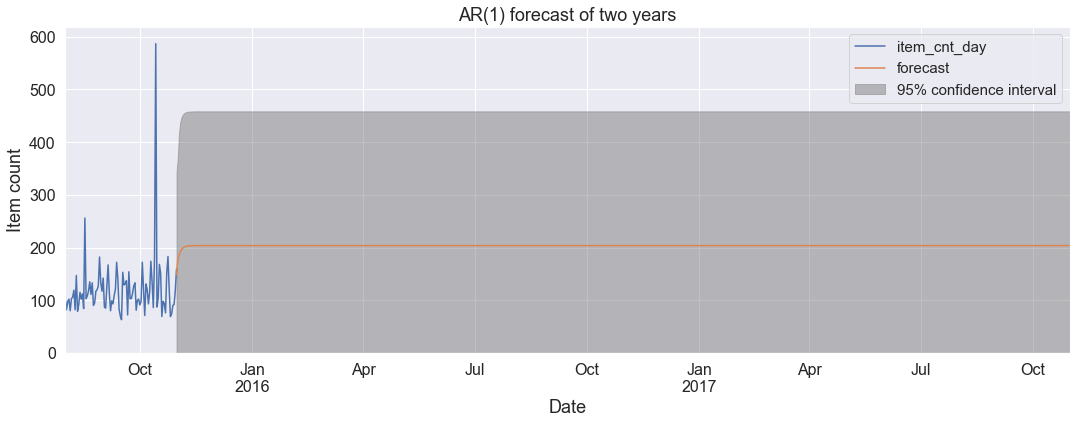

In [365]:
# 7. Predict the sales for two years after the end of the training dataset
fig, ax = plt.subplots(figsize=(18,6))
ax = train_20949.loc['2015-08-01':].plot(ax=ax)
plot_predict(ar1, '2015-10-31', '2017-10-31', ax=ax)
legend = ax.legend(loc='upper left')
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('AR(1) forecast of two years', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=15)
plt.show()

# ma1

In [359]:
## 8. Fit and plot a moving average model, and print the estimates
ma1 = ARIMA(train_20949['item_cnt_day'],order=(0,0,1)).fit();
print(ma1.summary())

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5621.186
Date:                Wed, 25 Jan 2023   AIC                          11248.373
Time:                        03:29:28   BIC                          11262.849
Sample:                    04-24-2013   HQIC                         11253.897
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.7179      7.393     27.555      0.000     189.228     218.208
ma.L1          0.5261      0.013     39.752      0.000       0.500       0.552
sigma2      1.171e+04    239.737     48.857      0.0

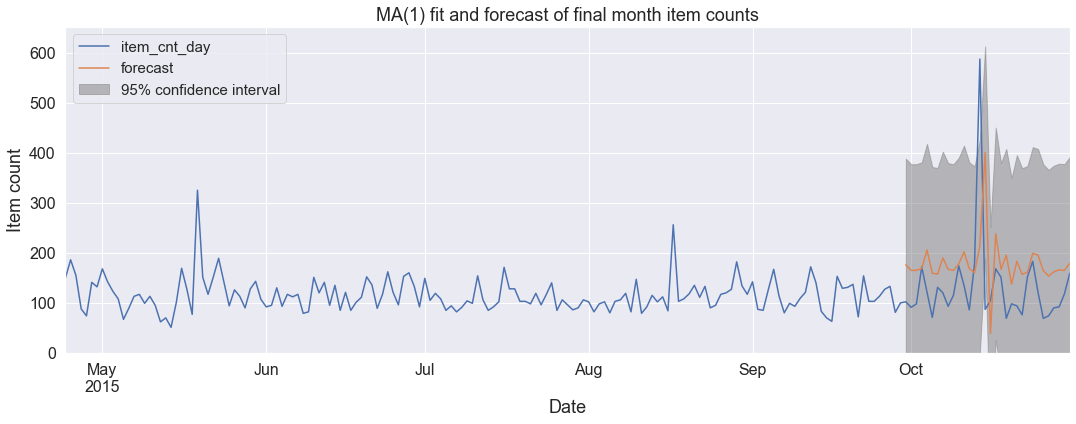

In [360]:
fig, ax = plt.subplots(figsize=(18,6))
ax = train_20949.loc['2015-04-24':].plot(ax=ax)
plot_predict(ma1, '2015-09-30', '2015-10-31', ax=ax)
legend = ax.legend(loc='upper left')
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('MA(1) fit and forecast of final month item counts', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=15)
plt.show()

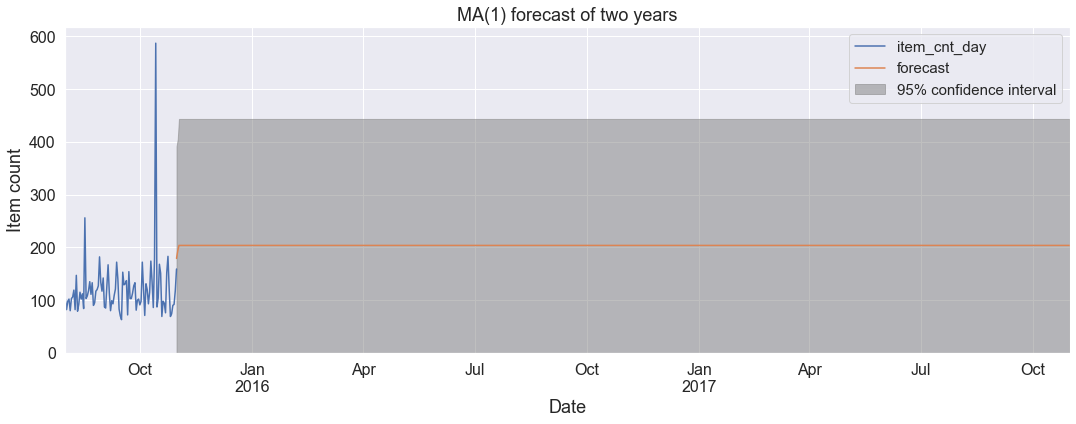

In [361]:
## 9. Make a 1 to 15 steps forecast, and plot the 95 percent confidence intervals
fig, ax = plt.subplots(figsize=(18,6))
ax = train_20949.loc['2015-08-01':].plot(ax=ax)
plot_predict(ma1, '2015-10-31', '2017-10-31', ax=ax)
legend = ax.legend(loc='upper left')
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('MA(1) forecast of two years', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=15)
plt.show()

In [362]:
## 10. Compare the goodness of fit of AR and MA models through AIC and BIC criteria

### AR(1)

print(ar1.summary())

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5541.908
Date:                Wed, 25 Jan 2023   AIC                          11089.816
Time:                        03:29:28   BIC                          11104.292
Sample:                    04-24-2013   HQIC                         11095.340
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.7371     13.302     15.316      0.000     177.666     229.808
ar.L1          0.6462      0.013     49.451      0.000       0.621       0.672
sigma2      9844.9144    176.276     55.849      0.0

In [52]:
### MA(1)

print(ma1.summary())

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5621.186
Date:                Tue, 24 Jan 2023   AIC                          11248.373
Time:                        16:27:48   BIC                          11262.849
Sample:                    04-24-2013   HQIC                         11253.897
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.7179      7.393     27.555      0.000     189.228     218.208
ma.L1          0.5261      0.013     39.752      0.000       0.500       0.552
sigma2      1.171e+04    239.737     48.857      0.0

Based on AR(1) and MA(1) summaries above, we can see that AR(1) fitted the data better based on its lower values of AIC, BIC, and Log Likelihood 

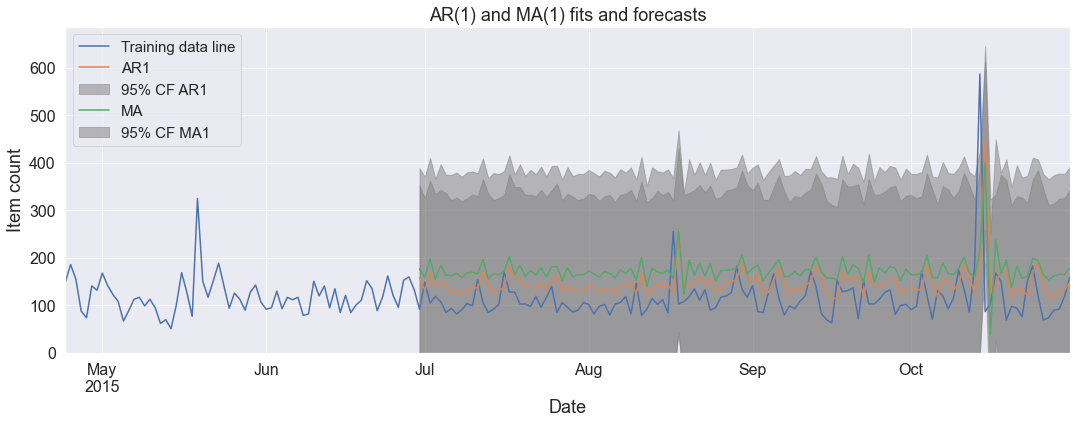

In [267]:
# 11. What model performs the best according to you ?
fig, ax = plt.subplots(figsize=(18,6))
ax = train_20949.loc['2015-04-24':].plot(ax=ax)
# plotting ar's fit
plot_predict(ar1, '2015-06-30', '2015-10-31', ax=ax,alpha=0)
# plotting ma's fit
plot_predict(ma1, '2015-06-30', '2015-10-31', ax=ax,alpha = 100)
plt.legend()
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('AR(1) and MA(1) fits and forecasts', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(['Training data line','AR1', '95% CF AR1','MA','95% CF MA1'],fontsize=15)
plt.show()

Based on my personal evaluation, they both performed very similarly, while AR1 seems to have captured more the minor flucations of the series than MA1

ACF plot of first 10 lags


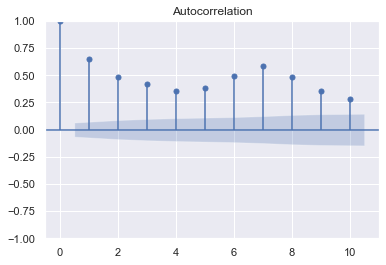

ACF plot of first 50 lags


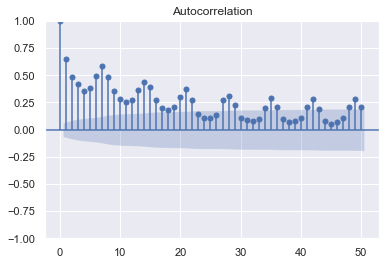

ACF plot of first 100 lags


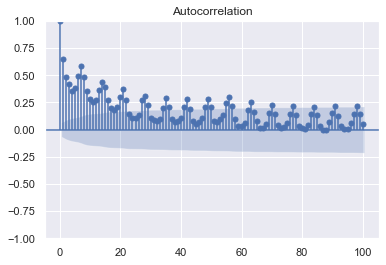

In [279]:
## 12. Make the ACF plots for various lags
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4))
    print("ACF plot of first 10 lags")
    plot_acf(train_20949['item_cnt_day'],lags =10)
    plt.show()
    print("ACF plot of first 50 lags")
    plot_acf(train_20949['item_cnt_day'],lags =50)
    plt.show()
    print("ACF plot of first 100 lags")
    plot_acf(train_20949['item_cnt_day'],lags =100)
    plt.show()

In [55]:
## 13. Use the residual analysis graphics of the Sarima function to check whether there are patterns in the residuals
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5541.908
Date:                Tue, 24 Jan 2023   AIC                          11089.816
Time:                        16:27:49   BIC                          11104.292
Sample:                    04-24-2013   HQIC                         11095.340
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.7371     13.302     15.316      0.000     177.666     229.808
ar.L1          0.6462      0.013     49.451      0.000       0.621       0.672
sigma2      9844.9144    176.276     55.849      0.000    9499.420    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   5.11   Jarque-Bera (JB):             14169.40
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             2.03
Prob(H) (two-sided):                  0.07   Kurtosis:                        21.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

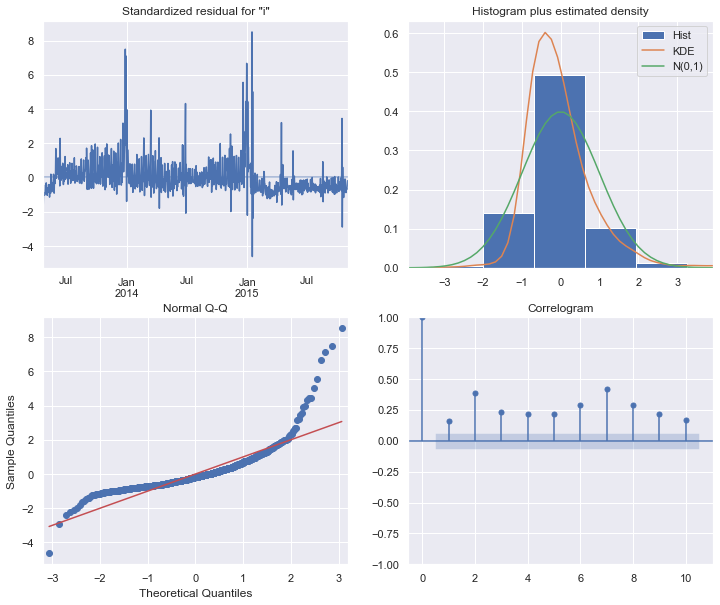

In [281]:
# plotting mresidual diagnostics for ma1
ma1.plot_diagnostics(figsize=(12, 10)) 
plt.show()

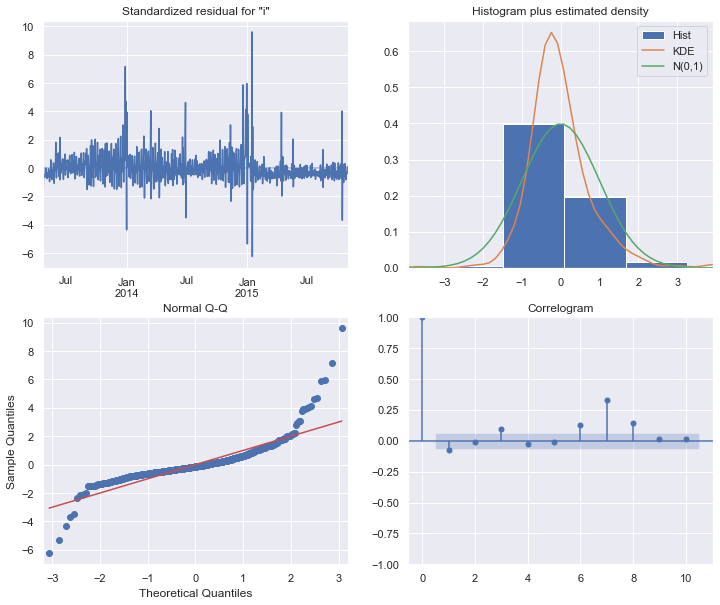

In [280]:
# plotting mresidual diagnostics for ma1
ar1.plot_diagnostics(figsize=(12, 10)) 
plt.show()

14. Do you see any patterns in the residuals for the diverse models you have implemented ?

    From the residual diagnostics above, we can see that the residuals of the AR1 model aren't normally distributed compared to those of MA1, therefore we have to question the significance of forecasts that can be done using AR1

15. How should Q-Q plot look like when the model is a good fit ?

    If the model is a good fit, the residuals should be normally distributed. In this case, a Q-Q plot of the residuals should show a pattern of points that approximately follows a straight line. This indicates that the residuals are approximately normally distributed, and that the model is a good fit for the data.

    On the other hand, if the Q-Q plot shows a pattern of points that deviates significantly from a straight line, it suggests that the residuals are not normally distributed. This could indicate that the model is not a good fit for the data and that a different model or a different set of model parameters should be considered.

    Therefore, this is the reason why can't rely on AR(1) in this problem, since its residuals aren't normally distributed

16. Fit various models (ARMA(1,1) - ARMA(2,1) - ARIMA(1,1,1) - ARIMA(1,1,0 to the Kaggle time series, and plot the t-table, check diagnostics

In [283]:
# ARMA(1,1)
arma11 = ARIMA(train_20949,order=(1,0,1));
arma11fit = arma11.fit();

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5531.608
Date:                Wed, 25 Jan 2023   AIC                          11071.216
Time:                        00:53:30   BIC                          11090.518
Sample:                    04-24-2013   HQIC                         11078.582
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.6957     17.317     11.763      0.000     169.755     237.637
ar.L1          0.8212      0.014     58.854      0.000       0.794       0.849
ma.L1         -0.3245      0.023    -13.879      0.0

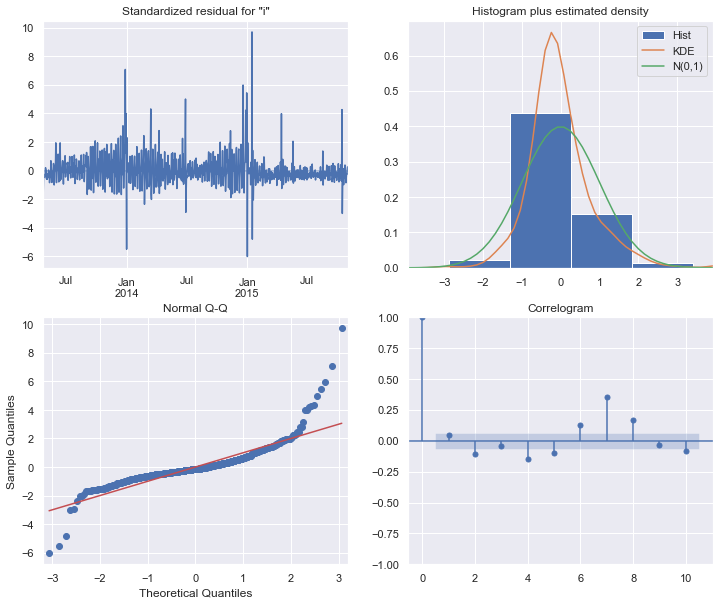

In [284]:
print(arma11fit.summary())
arma11fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

In [285]:
#  ARMA(2,1)
arma21 = ARIMA(train_20949['item_cnt_day'],order=(2,0,1));
arma21fit = arma21.fit();

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -5501.980
Date:                Wed, 25 Jan 2023   AIC                          11013.959
Time:                        00:53:49   BIC                          11038.086
Sample:                    04-24-2013   HQIC                         11023.166
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.6541     35.532      5.732      0.000     134.013     273.296
ar.L1          1.3318      0.024     56.442      0.000       1.286       1.378
ar.L2         -0.3479      0.021    -16.390      0.0

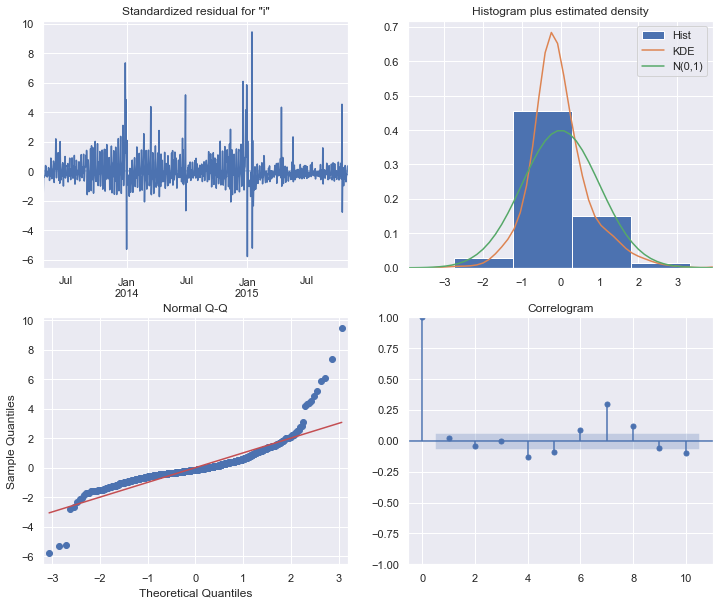

In [286]:
print(arma21fit.summary())
arma21fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

In [287]:
#  AIRMA(1,1,1)
arima111 = ARIMA(train_20949['item_cnt_day'],order=(1,1,1));
arima111fit = arima111.fit();

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5500.631
Date:                Wed, 25 Jan 2023   AIC                          11007.261
Time:                        00:54:10   BIC                          11021.734
Sample:                    04-24-2013   HQIC                         11012.784
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3725      0.019     19.225      0.000       0.334       0.410
ma.L1         -0.8904      0.009    -98.381      0.000      -0.908      -0.873
sigma2      9127.2031    141.248     64.618      0.0

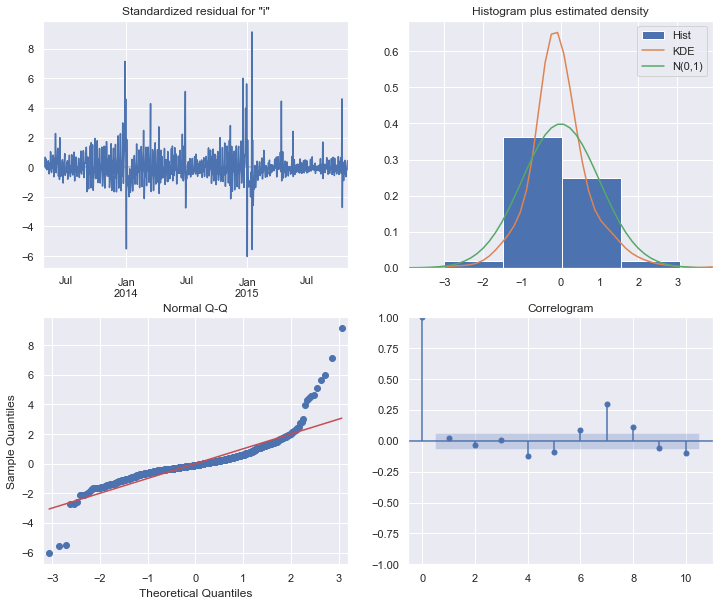

In [288]:
print(arima111fit.summary())
arima111fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

In [289]:
# ARIMA(1,1,0)
arima110 = ARIMA(train_20949['item_cnt_day'],order=(1,1,0));
arima110fit = arima110.fit();

                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                  921
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5590.010
Date:                Wed, 25 Jan 2023   AIC                          11184.020
Time:                        00:54:29   BIC                          11193.669
Sample:                    04-24-2013   HQIC                         11187.702
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2709      0.013    -20.683      0.000      -0.297      -0.245
sigma2      1.111e+04    161.012     68.980      0.000    1.08e+04    1.14e+04
Ljung-Box (L1) (Q):                   3.78   Jarque-

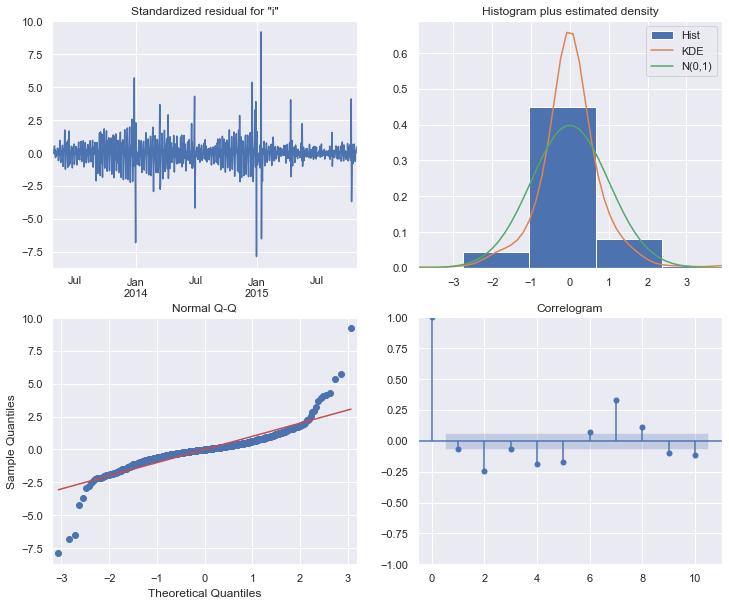

In [290]:
print(arima110fit.summary())
arima110fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

17

In [68]:
sarima21010012 = SARIMAX(train_20949['item_cnt_day'], order=(2,1,0), seasonal_order=(1,0,0,12))
# fit model
sarima21010012_fit = sarima21010012.fit()

                                     SARIMAX Results                                      
Dep. Variable:                       item_cnt_day   No. Observations:                  921
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -5555.758
Date:                            Tue, 24 Jan 2023   AIC                          11119.515
Time:                                    16:27:56   BIC                          11138.813
Sample:                                04-24-2013   HQIC                         11126.879
                                     - 10-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3495      0.014    -24.466      0.000      -0.378      -0.322
ar.L2         -0.2334      0.017   

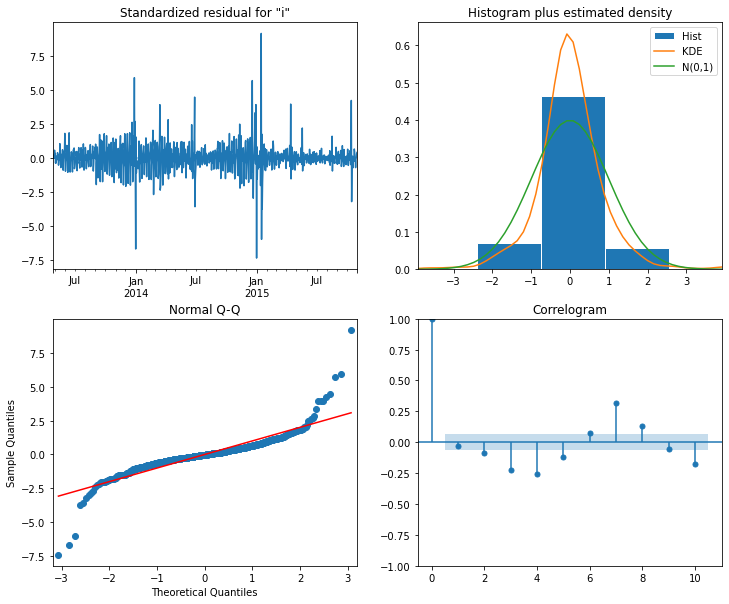

In [69]:
print(sarima21010012_fit.summary())
sarima21010012_fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

In [291]:
# 17. SARIMA(2,1,0,1,0,0,4)
sarima2101004 = SARIMAX(train_20949['item_cnt_day'], order=(2,1,0), seasonal_order=(1,0,0,4 ))
# fit model
sarima2101004_fit = sarima2101004.fit()

                                     SARIMAX Results                                     
Dep. Variable:                      item_cnt_day   No. Observations:                  921
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 4)   Log Likelihood               -5525.762
Date:                           Wed, 25 Jan 2023   AIC                          11059.523
Time:                                   00:56:24   BIC                          11078.821
Sample:                               04-24-2013   HQIC                         11066.887
                                    - 10-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4345      0.016    -26.954      0.000      -0.466      -0.403
ar.L2         -0.3324      0.015    -21.456

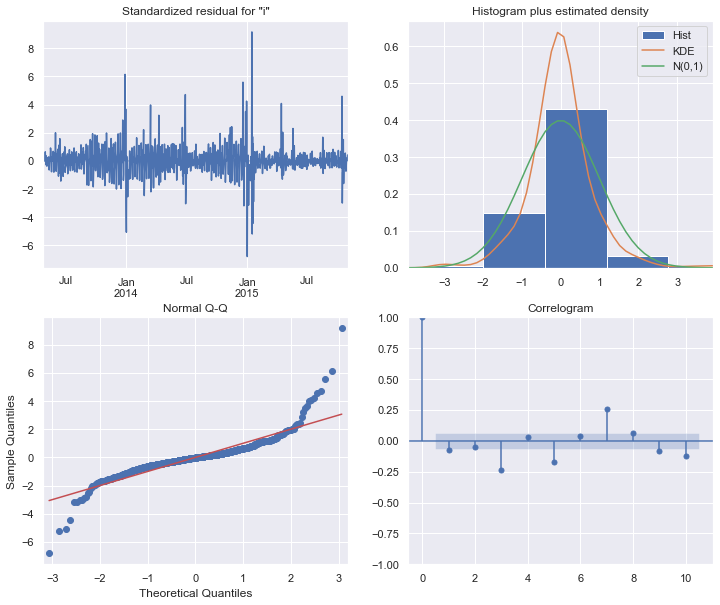

In [292]:
print(sarima2101004_fit.summary())
sarima2101004_fit.plot_diagnostics(figsize=(12, 10)) 
plt.show()

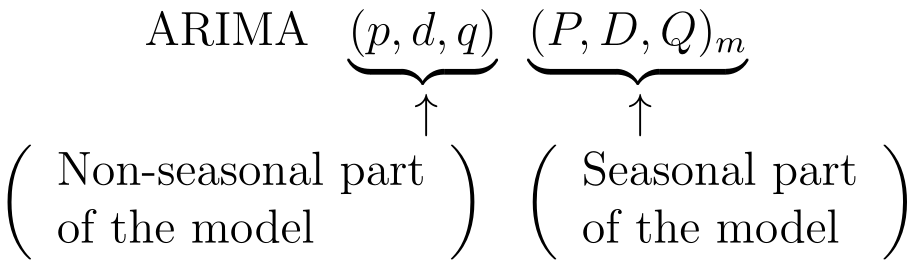

Mathematically, both ARIMA and SARIMA models are defined as a combination of three components: an autoregressive (AR) component, a differencing component (I for integrated), and a moving average (MA) component. The difference is that SARIMA includes a seasonal component in the form of a seasonal autoregressive (SAR) and seasonal moving average (SMA) term. ARIMA is a generalization of a moving average and autoregression model and SARIMA is a generalization of ARIMA with a seasonal component.

 18. Present a relevant sample of Ljung-Box tests, and explain how they can
be used to assess your models


Ljung-Box test on AR(1)

In [296]:
#perform Ljung-Box test on residuals with lag=5
print('Ljung-Box test on AR(1) at lag 5')
print(sm.stats.acorr_ljungbox(ar1.resid, lags=[5], return_df=True))
#perform Ljung-Box test on residuals with lag=50
print('Ljung-Box test on AR(1) at lag 50')
print(sm.stats.acorr_ljungbox(ar1.resid, lags=[50]))
#perform Ljung-Box test on residuals with lag=100
print('Ljung-Box test on AR(1) at lag 100')
print(sm.stats.acorr_ljungbox(ar1.resid, lags=[100], return_df=True))

Ljung-Box test on AR(1) at lag 5
     lb_stat  lb_pvalue
5  14.910402   0.010752
Ljung-Box test on AR(1) at lag 50
       lb_stat      lb_pvalue
50  629.656754  2.931940e-101
Ljung-Box test on AR(1) at lag 100
         lb_stat      lb_pvalue
100  1113.292318  1.098645e-170


Ljung-Box test on AIRMA(1,1,1)

In [300]:
#perform Ljung-Box test on residuals with lag=5
print('Ljung-Box test on AIRMA(1,1,1) at lag 5')
print(sm.stats.acorr_ljungbox(arima111fit.resid, lags=[5], return_df=True))
#perform Ljung-Box test on residuals with lag=50
print('Ljung-Box test on AIRMA(1,1,1) at lag 50')
print(sm.stats.acorr_ljungbox(arima111fit.resid, lags=[50]))
#perform Ljung-Box test on residuals with lag=100
print('Ljung-Box test on AIRMA(1,1,1) at lag 100')
print(sm.stats.acorr_ljungbox(arima111fit.resid, lags=[100], return_df=True))

Ljung-Box test on AIRMA(1,1,1) at lag 5
     lb_stat  lb_pvalue
5  22.322048   0.000455
Ljung-Box test on AIRMA(1,1,1) at lag 50
      lb_stat      lb_pvalue
50  712.12113  6.901466e-118
Ljung-Box test on AIRMA(1,1,1) at lag 100
         lb_stat      lb_pvalue
100  1385.617834  3.586500e-225


The Ljung-Box test is a statistical test used to assess the validity of a time series model, and it can be used to test the null hypothesis that the residuals of a time series model are independently and identically distributed (i.i.d.). In other words, it tests whether the residuals of the model are random or not.

The test statistic for the Ljung-Box test is calculated as the sum of the autocorrelations of the residuals, up to a certain lag. The test statistic is then compared to a chi-squared distribution to determine the p-value. A low p-value (typically less than 0.05) indicates that the null hypothesis of independence and identical distribution of the residuals should be rejected, suggesting that the model is not a good fit for the data.

When using Ljung-Box test to assess your models, the test statistic and p-value are used to decide whether to accept or reject the null hypothesis. If the null hypothesis is rejected, it means that the residuals are not independent and identically distributed, and therefore the model does not fit well with the data. This can indicate that there is some underlying structure in the residuals that is not captured by the model, such as a trend or seasonality, and may need to consider a different model or incorporate additional variables.

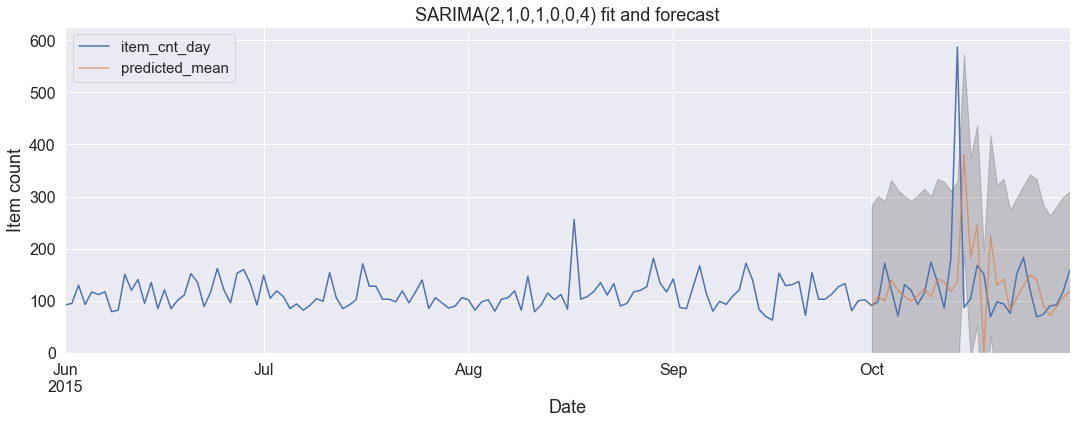

In [308]:
# 19 Use your favourite model to forecast the time series on the available test datasets

#using sarima(2,1,0,1,0,0,4)
# forecasting the last month of the data
pred = sarima2101004_fit.get_prediction(start=pd.to_datetime('2015-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train_20949['2015-06-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, alpha=.7, figsize=(18,6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title('SARIMA(2,1,0,1,0,0,4) fit and forecast', fontsize=18);
plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=15)
plt.show()

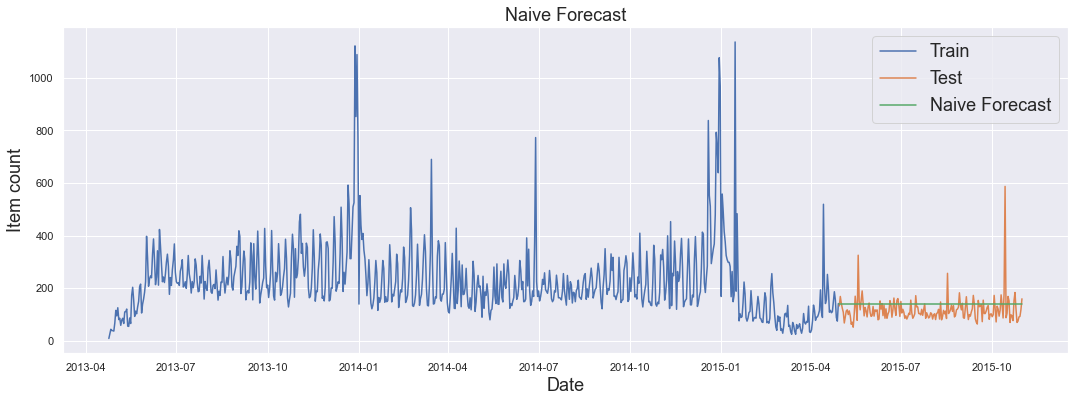

In [307]:
# 20  Perform a naive forecast based on the forecast package, to predict the sales for the training datasets

#splitting the data to training and test
train_set, test_set= np.split(train_20949, [int(.8 *len(train_20949))])
dd= np.asarray(train_set)
y_hat_naive = dd[len(dd)-1]
#using the last value of the training set as a prediction for the whole test set
y_hat_naive = [y_hat_naive[0]]*len(test_set.index)
plt.figure(figsize=(18,6))
plt.plot(train_set.index, train_set.item_cnt_day, label='Train')
plt.plot(test_set.index,test_set.item_cnt_day, label='Test')
plt.plot(test_set.index,y_hat_naive, label='Naive Forecast')
plt.legend(loc='best', fontsize=18)
plt.ylabel('Item count', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.title("Naive Forecast", fontsize=18)
plt.show()

21. What correspond the two shades of blue in the confidence intervals

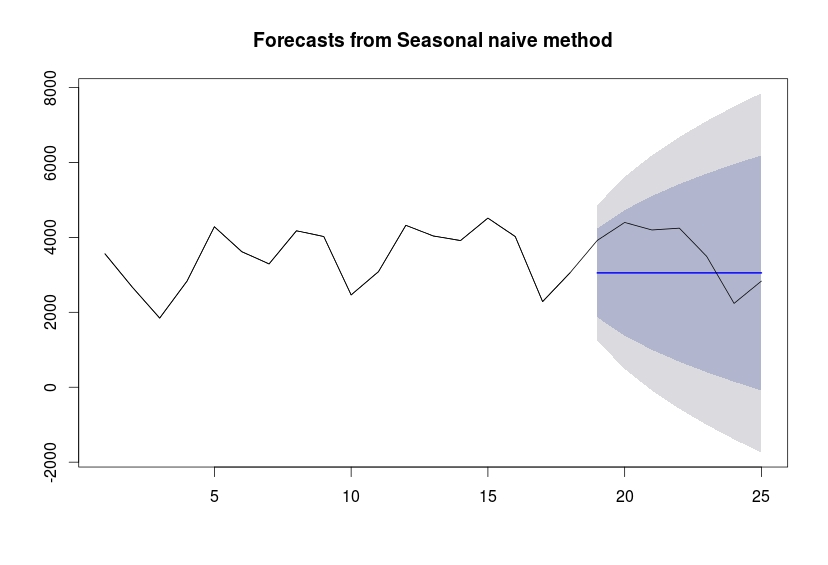

In the figure above, the blue shaded area represent the 80% confidence interval of the Naive forecasting model, while the grey shade represent its 95% confidence interval.

In [315]:
# 22 calculating RMSE for the Naive forecasting model
rmse_naive = mean_squared_error(test_set.item_cnt_day, y_hat_naive, squared=False)
print("RMSE of the Naive forecasting model: "+ str(round(rmse_naive,2)))

RMSE of the Naive forecasting model: 53.64


RMSE stands for Root Mean Squared Error, and it is a measure of the difference between the predicted values and the actual values in a dataset, commonly used in regression analysis. The RMSE is calculated as the square root of the mean of the squared differences between the predicted and actual values.

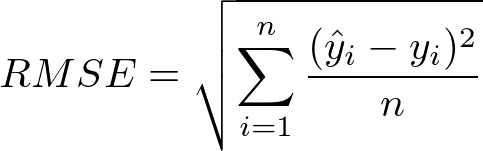

On the other hand, MAE stands for Mean Absolute Error, it is a measure of the difference between the predicted and actual values in a dataset, and it is calculated as the mean of the absolute differences between the predicted and actual values.

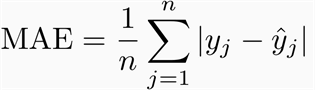

Both RMSE and MAE are used to evaluate the performance of a prediction model, but they are sensitive to different types of errors. RMSE gives a higher weight to larger errors, while MAE gives equal weight to all errors. In general, RMSE is considered more robust to outliers than MAE.

RMSE is usually preferred to MSE (Mean Squared Error) because it is in the same units as the response variable and therefore it is easier to interpret. The square root of MSE is called the standard deviation of the residuals, also known as Root MSE. So, RMSE is the square root of MSE, making it interpretable in the same unit of the response variable.

In [316]:
# 23. Write a command that only returns the mean absolute percentage error
mape_naive = mean_absolute_percentage_error(test_set.item_cnt_day, y_hat_naive)
print(("The mean absolute percentage error of the Naive forecasting model: "+ str(round(mape_naive,2))))

The mean absolute percentage error of the Naive forecasting model: 0.37


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

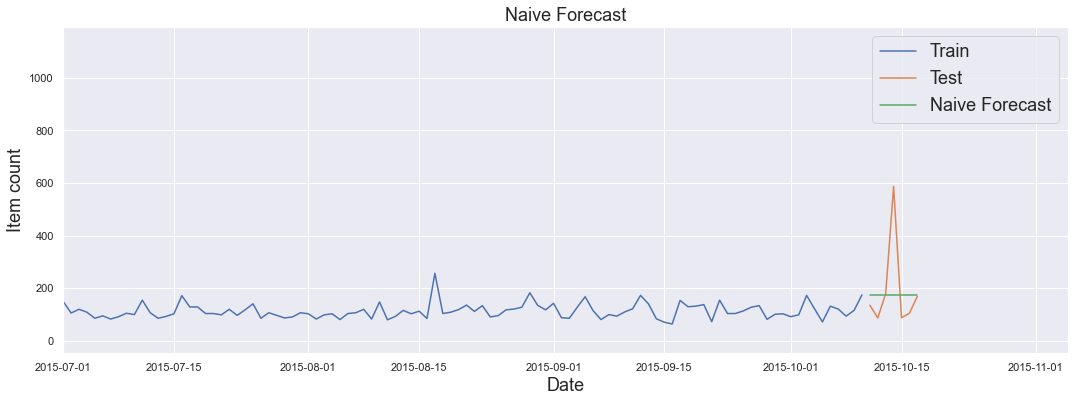

RMSE: 165.7726498206849


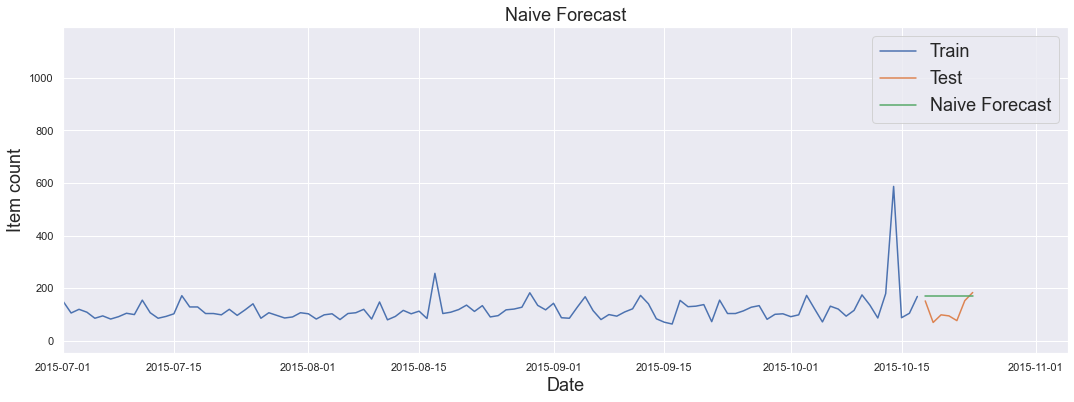

RMSE: 64.81952968489843


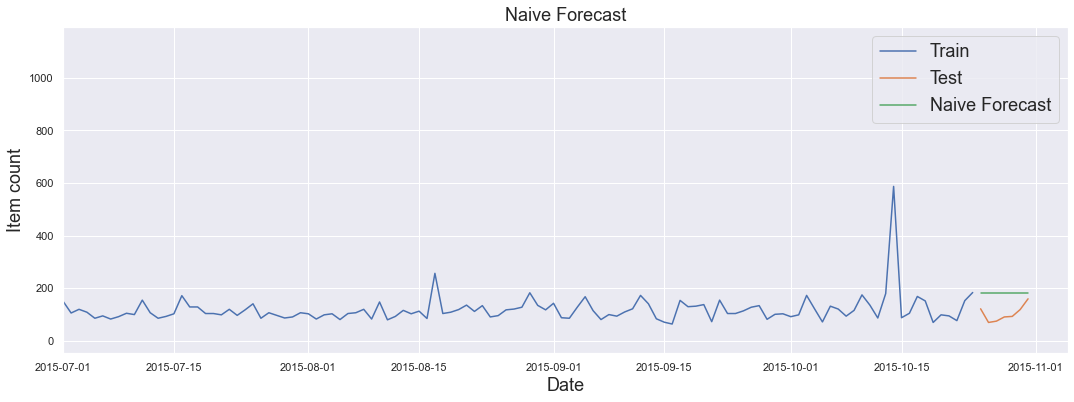

RMSE: 84.89657573441093


In [318]:
#24 Compute cross-validated errors for up to a week ahead, with a naive forecast approach

# splitting data to X and Y
X = train_20949.index
y = train_20949.item_cnt_day

# defining the cross validation split as 3 splits
tscv = TimeSeriesSplit(n_splits=3, test_size=7)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_hat_naive = [y_train[-1]]*len(y_test)
    plt.figure(figsize=(18,6))
    plt.plot(X_train, y_train, label='Train')
    plt.plot(X_test,y_test, label='Test')
    plt.plot(X_test,y_hat_naive, label='Naive Forecast')
    plt.legend(loc='best')
    plt.legend(loc='best', fontsize=18)
    plt.ylabel('Item count', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.title("Naive Forecast", fontsize=18)
    plt.xlim(left=pd.Timestamp('2015-07'),right=pd.Timestamp('2015-11-05'))
    plt.show()
    print("RMSE: "+str(mean_squared_error(y_test, y_hat_naive, squared=False)))

In [319]:
# 25. Use Auto-ARIMA to fit a model to your data. How does Auto-ARIMA work ?

auto1 = pm.auto_arima(train_20949, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11097.459, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12724.224, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11218.891, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12011.100, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11020.709, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11170.101, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11019.107, Time=0.73 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11130.298, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11014.012, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11019.584, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=11015.487, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 6.099 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  921
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -5501.006
Date:                Tue, 24 Jan 2023   AIC                          11014.012
Time:                        16:28:05   BIC                          11042.965
Sample:                    04-24-2013   HQIC                         11025.060
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3976      0.022     17.938      0.000       0.354       0.441
ar.L2          0.9265      0.028     33.456      0.000       0.872       0.981
ar.L3         -0.3288      0.027    -12.077      0.0

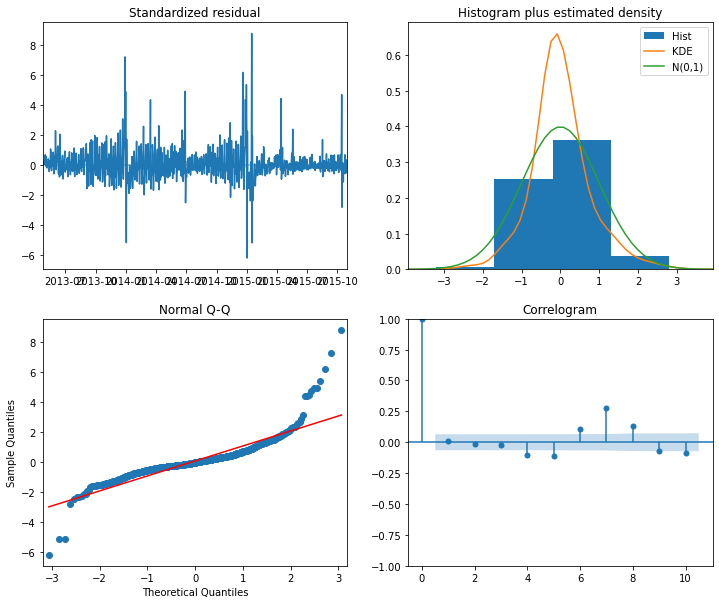

In [80]:
print(auto1.summary())
auto1.plot_diagnostics(figsize=(12, 10));

Auto-ARIMA is a method for automatically selecting the best parameters for an ARIMA model, which is a type of time series forecasting model. The process identifies the appropriate values for the parameters of the model by fitting the model based on pre-specified ranges for p and q values, and then chooses the best model based on a goodness of fit criteria such as AIC. Once the best parameters have been identified, the ARIMA model can be used to make predictions about future values in the time series.

# 3. Forecasting with Prophet

## 3.1 Introduction to forecasting with Prophet

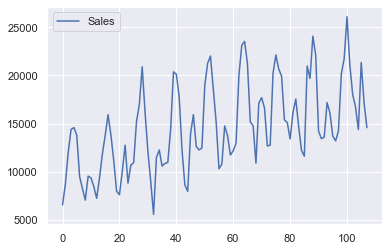

In [320]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
df.plot();
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])


In [321]:
df.head()

ds      y
0 1960-01-01   6550
1 1960-02-01   8728
2 1960-03-01  12026
3 1960-04-01  14395
4 1960-05-01  14587

In [322]:
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15396.026630  13780.900070  16902.247913
1 1969-02-01  16165.838547  14537.878559  17673.445643
2 1969-03-01  21369.121163  19751.669722  22921.773873
3 1969-04-01  23494.793981  22006.785010  25023.932427
4 1969-05-01  25004.900023  23473.265160  26483.045784


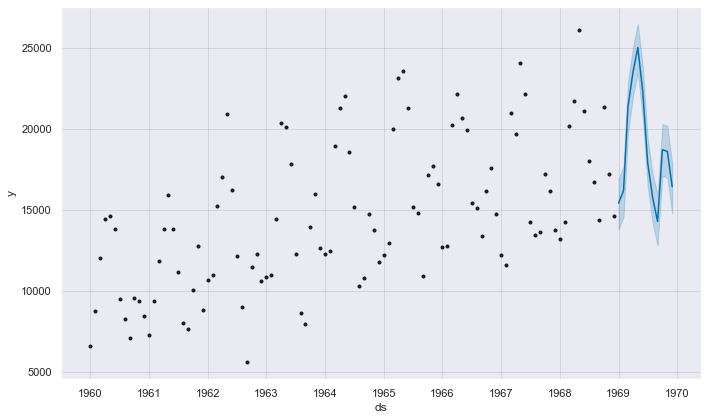

In [323]:
# plot forecast
model.plot(forecast)
pyplot.show()

MAE: 1370.695


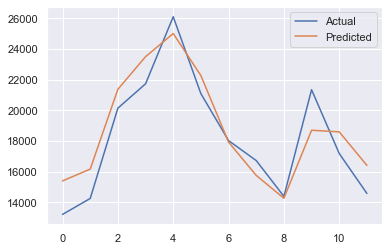

In [324]:
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

Explain in less than 150 words how Prophet differ from other models like auto.arima. What are its specificities ?

 Prophet procedure is an additive regression model with four main components: A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data. On the other hand, Auto-ARIMA is a method for automatically selecting the best parameters for an ARIMA model and it's a more traditional prophet series forecasting method. For choosing the best performing model, You doesn't use AIC or BIC as in Auto-Arima because it is a Bayesian model, while AIC and BIC are about the likelihood. For Bayesian model we would rather use WAIC or DIC, or cross-validation.

## 3.2 Multiple Time Series Store Items Demand Forecasting Challenge with Prophet

https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data?select=train.csv

Dataset Description

The objective of this competition is to predict 3 months of item-level sales data for 10 different stores.

File descriptions

train.csv - Training data

test.csv - Test data (Note: the Public/Private split is time based)

sample_submission.csv - a sample submission file in the correct format

Data fields

date - Date of the sale data. There are no holiday effects or store closures.<br>
store - Store ID<br>
item - Item ID<br>
sales - Number of items sold at a particular store on a particular date.<br>

In [325]:
# importing data
demand_train = pd.read_csv('.//..//Datasets//Demand forecasting//train.csv')
demand_test = pd.read_csv('.//..//Datasets//Demand forecasting//test.csv')

In [329]:
demand_train['date'] = pd.to_datetime(demand_train['date'])

In [330]:
demand_train.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

In [331]:
demand_test.head()

id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1

In [332]:
demand_train.shape

(913000, 4)

In [333]:
print('start date: '+ str(demand_train.date[0]))
print('start date: '+  str(demand_train.date[demand_train.shape[0]-1]))

start date: 2013-01-01 00:00:00
start date: 2017-12-31 00:00:00


In [334]:
# subsetting the last 6 months of the data
demand_train = demand_train[demand_train.date> '2017-06-30']
demand_train.head()

date  store  item  sales
1642 2017-07-01      1     1     31
1643 2017-07-02      1     1     38
1644 2017-07-03      1     1     18
1645 2017-07-04      1     1     23
1646 2017-07-05      1     1     23

In total there are : 365.2days * 5years * 10stores *50items = 913000 records.

In [336]:
# defining a unique ticker (label) for each product in a store
demand_train['ticker'] = demand_train.store.astype(str)+demand_train.item.astype(str)

In [337]:
demand_train.head()

date  store  item  sales ticker
1642 2017-07-01      1     1     31     11
1643 2017-07-02      1     1     38     11
1644 2017-07-03      1     1     18     11
1645 2017-07-04      1     1     23     11
1646 2017-07-05      1     1     23     11

In [338]:
#dropping item and store IDs
demand_train = demand_train.drop(['store','item'], axis=1)
demand_train['sales'] = demand_train['sales'].astype(float)
demand_train.head()

date  sales ticker
1642 2017-07-01   31.0     11
1643 2017-07-02   38.0     11
1644 2017-07-03   18.0     11
1645 2017-07-04   23.0     11
1646 2017-07-05   23.0     11

In [339]:
# preparing the data for injecting it to prophet
df_prophet = demand_train.rename(columns={'date': 'ds', 'sales':'y'})
df_prophet.head()

ds     y ticker
1642 2017-07-01  31.0     11
1643 2017-07-02  38.0     11
1644 2017-07-03  18.0     11
1645 2017-07-04  23.0     11
1646 2017-07-05  23.0     11

In [340]:
df_prophet_train= df_prophet[df_prophet.ds<='2017-09-30']
df_prophet_test= df_prophet[df_prophet.ds>'2017-09-30']

In [341]:
# Group the data by ticker
groups_by_ticker_train = df_prophet_train.groupby('ticker')
groups_by_ticker_test = df_prophet_test.groupby('ticker')
groups_by_ticker = df_prophet.groupby('ticker')
# Check the groups in the dataframe
list(groups_by_ticker_train.groups.keys())[:10]

['101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018']

In [343]:
# Multiple Time Series with a for loop 10 shops * 50 items: 500 items
# Start time
start_time = time()
# Create an empty dataframe
for_loop_forecast = pd.DataFrame()
# Loop through each ticker
for ticker in list(groups_by_ticker_train.groups.keys())[:5]:
    # Get the data for the ticker
    group = groups_by_ticker_train.get_group(ticker)
    # Initiate the model
    m = Prophet()
    # Fit the model
    m.fit(group)
    # Make predictions
    future = m.make_future_dataframe(periods=len(groups_by_ticker_test.get_group(ticker).ds))
    forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast['ticker'] = group['ticker'].iloc[0]
    
    forecast = forecast[['ds', 'ticker', 'yhat', 'yhat_upper', 'yhat_lower']]
    # Add the forecast results to the dataframe
    for_loop_forecast = pd.concat((for_loop_forecast, forecast))
print('The time used for the for-loop forecast is ', time()-start_time)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

The time used for the for-loop forecast is  13.816927671432495


In [369]:
# defining a function to plot forecasts of the different products
def plot_for_ticker(ticker): 
    prophetticker = for_loop_forecast[for_loop_forecast.ticker==ticker]
    predictions = prophetticker[prophetticker.ds>'2017-09-30'].yhat
    plt.figure(figsize=(18,6))
    plt.plot(groups_by_ticker_train.get_group(ticker).ds, groups_by_ticker_train.get_group(ticker).y, label='Train')
    plt.plot(groups_by_ticker_test.get_group(ticker).ds,groups_by_ticker_test.get_group(ticker).y, label='Test')
    plt.plot(groups_by_ticker_test.get_group(ticker).ds,predictions, label='FB Forecast')
    plt.legend(loc='best', fontsize=18)
    plt.title("Prophet Forecast for product "+ticker, fontsize=18)
    plt.ylabel('Item count', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    print("RMSE: "+str(mean_squared_error(groups_by_ticker_test.get_group(ticker).y, predictions, squared=False)))
    plt.show()


### forcasting demand for item 1, 10,11,12, and 13 of store 10 -> ( store '10'+ item '1') = 101 

RMSE: 5.723213698539978


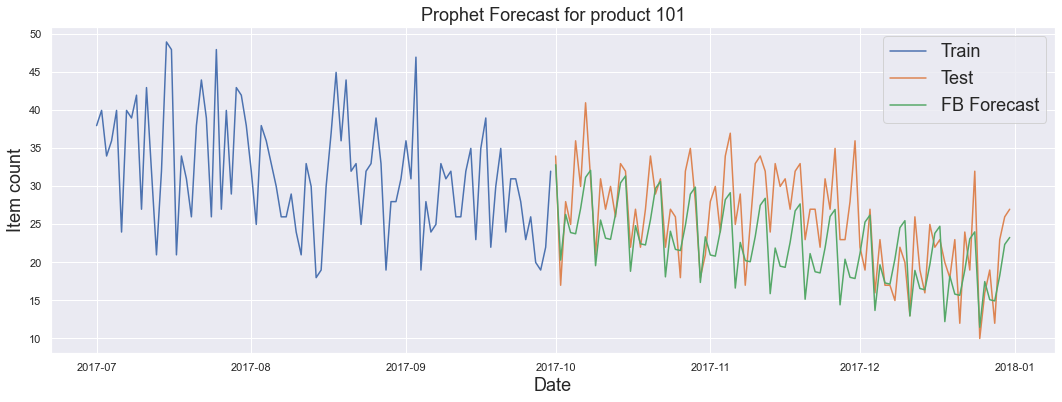

RMSE: 13.858623029854236


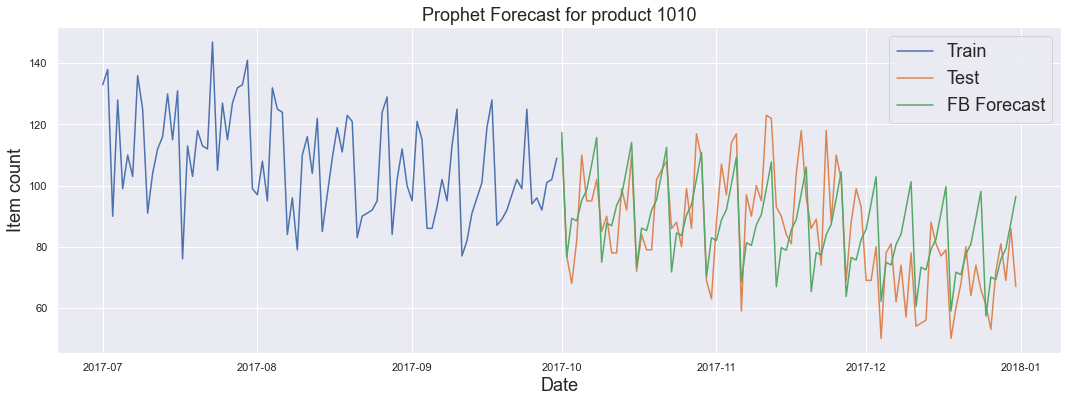

RMSE: 16.992115390064765


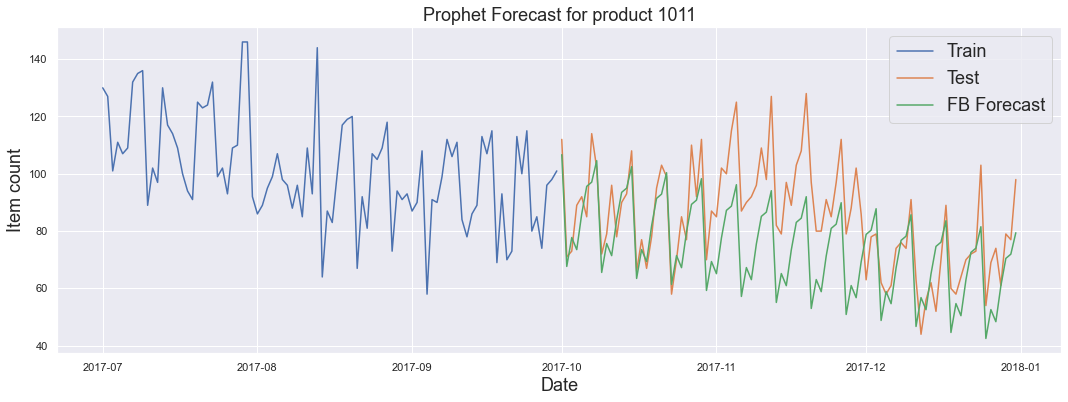

RMSE: 14.912848829238438


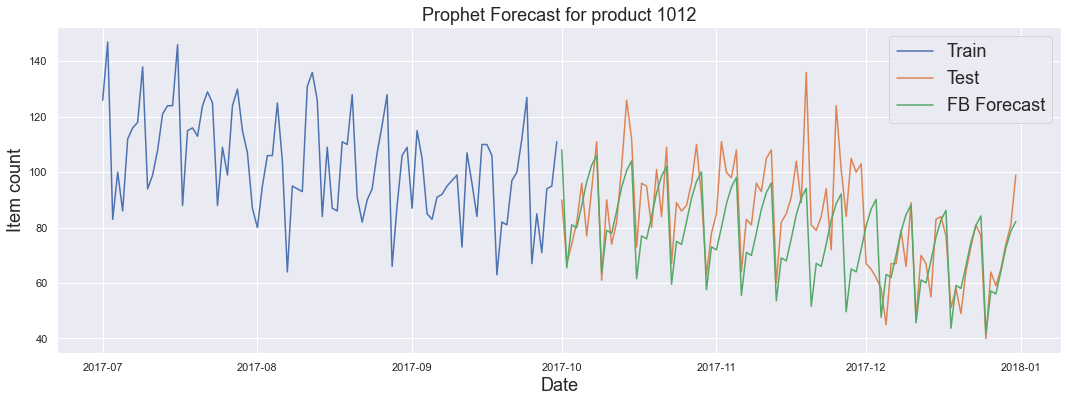

RMSE: 15.388663259773129


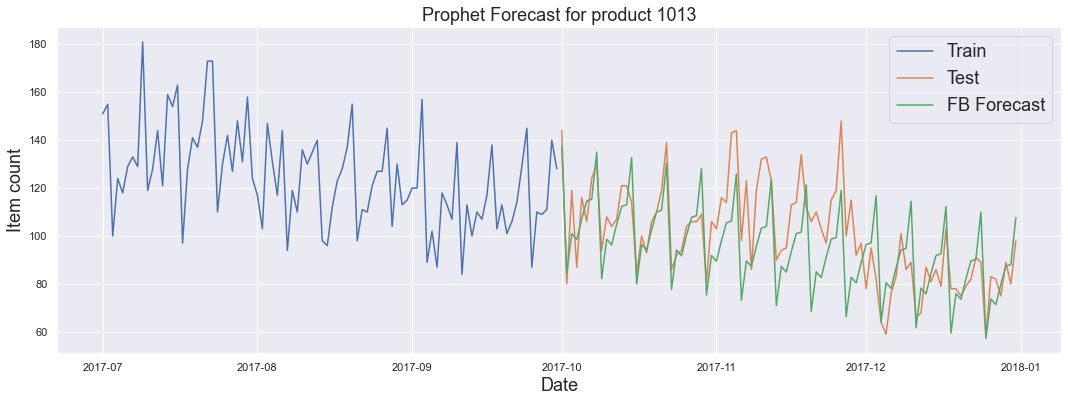

In [370]:
# plot the predictions of the first  products in the dataset
for i in list(groups_by_ticker_train.groups.keys())[:5]:
    plot_for_ticker(i)

# 4. Fourier Transform

## 4.1 Introduction to Fourier Transform

Play around with this Interactive website dedicated to Fourier transforms
and reach a configuration where the frequency 4 has the highest peak.

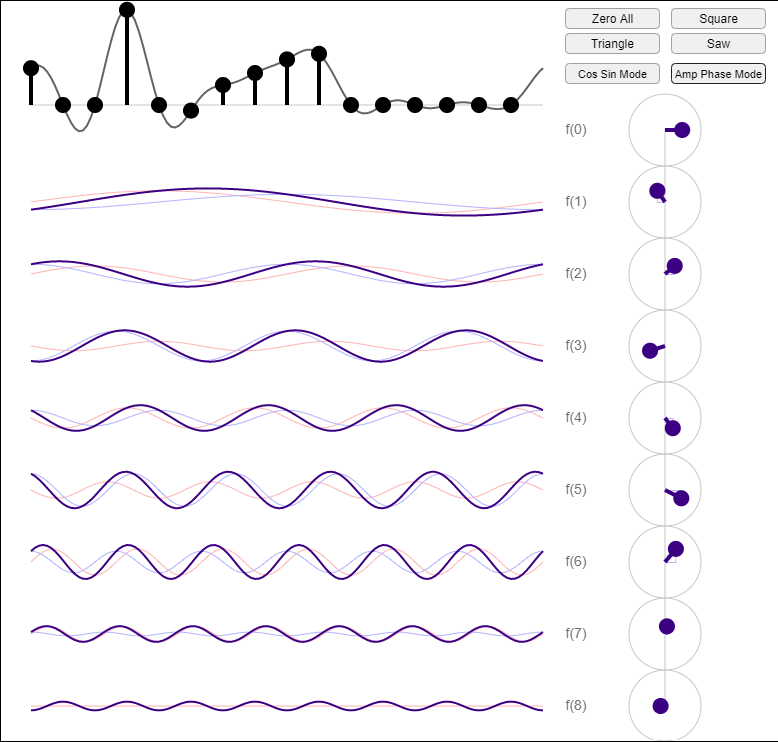

Let’s try with one eg. We’ll make a trajectory given the following complex wave

\begin{align}
f(t)=2+0.75×sin(3wt)+0.25×sin(7wt)+0.5×sin(10wt)
\end{align}

In [110]:
def plot_frequency_spectra(X_k, xlimits=None):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(np.abs(X_k))
    plt.title('Frequency spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    if xlimits is not None:
        plt.xlim(xlimits[0], xlimits[1])
    plt.show()


def plot_harmonic(X_k, i, ts, acq_freq, color="red"):
    X_k_h = np.zeros(len(X_k))
    X_k_h[i] = X_k[i] # i-th harmonic
    harmonic_trajectory = np.real(ifft(X_k_h)) / acq_freq
    plt.plot(ts, harmonic_trajectory)


def plot_show(trajectory, time=1, harmonics=[-1], plot_freq=False):
    acq_freq = len(trajectory)/time
    ts = np.arange(0, time, 1 / acq_freq)
    X_k = fft(trajectory)
    x_n = np.real(ifft(X_k)) / acq_freq
    if plot_freq:
        plot_frequency_spectra(X_k)
    max_y = np.ceil(1.5 * np.max(np.abs(x_n)))
    if harmonics[0] == -1:
        min_y = np.floor(np.min(np.abs(x_n))) - 1
    else:
        min_y = np.ceil(-1.5 * np.max(np.abs(x_n)))
    plt.plot(ts, x_n)
    plt.plot(ts, trajectory)
    plt.xlabel('Ts')
    plt.ylabel('X_n')
    if harmonics[0] > -1:
        for i in range(0, len(harmonics)):
            plot_harmonic(X_k, harmonics[i], ts, acq_freq, color=i + 1)
    plt.show()
    
def f(t, w):
    return dc_component + np.sum(component_strength * np.sin(component_freqs * w * t + component_delay))

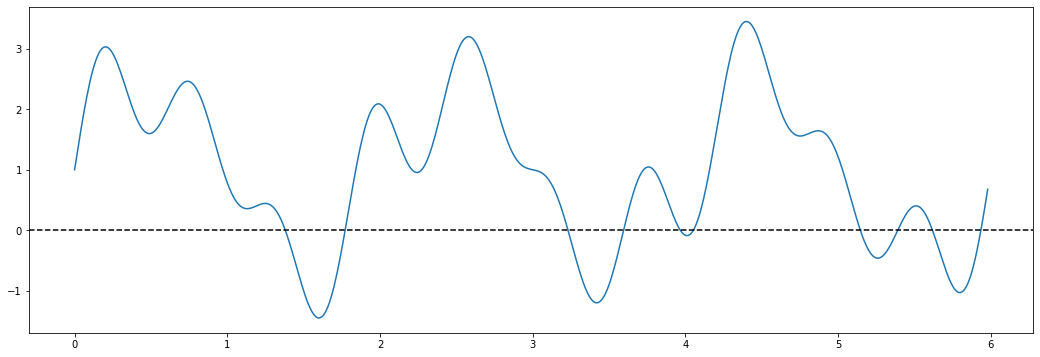

In [111]:
# tranform the the r code above to python
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft,fft, fftfreq, fftshift
from scipy import signal
acq_freq = 100
time = 6
ts = np.arange(0, time - 1 / acq_freq, 1 / acq_freq)
f_0 = 1 / time

# tranform the the r code above to python  
dc_component = 1
component_freqs = np.array([3, 7, 10])
component_delay = np.array([0, 0, 0])
component_strength = np.array([1.5, .5, .75])


def f(t, w):
    return dc_component + np.sum(component_strength * np.sin(component_freqs *w * t + component_delay))

# convert the r code above to python
def plot_fourier(fourier_series, f_0, ts):

    w =  2*np.pi * f_0
    trajectory = np.array([fourier_series(t, w) for t in ts])
    plt.figure(figsize=(18,6))
    plt.plot(ts, trajectory)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.show()

plot_fourier(f, f_0, ts)

Let’s assume that we don’t know the functional form of trajectory, we only have its contents, the period and the sampling time points:

In [112]:
w = 2 * np.pi * f_0
trajectory = np.array([f(t, w) for t in ts])

So, given that trajectory we can find where the frequency peaks are:

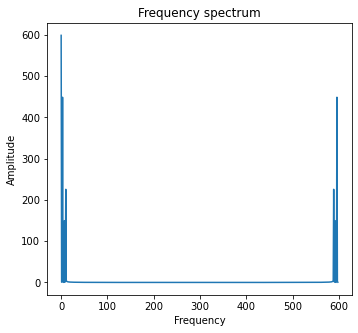

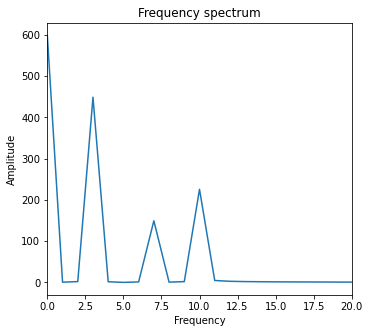

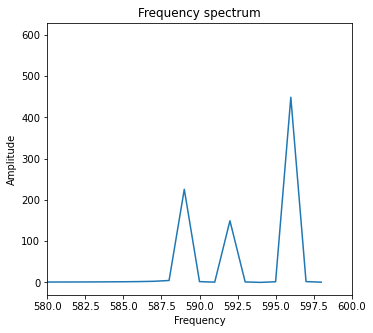

In [113]:
X_k = fft(trajectory)                   # find all harmonics with fft()
plot_frequency_spectra(X_k)
plot_frequency_spectra(X_k, xlimits=[0, 20])
plot_frequency_spectra(X_k, xlimits=[580,600])

And if we only had the frequency peaks we could rebuild the signal:

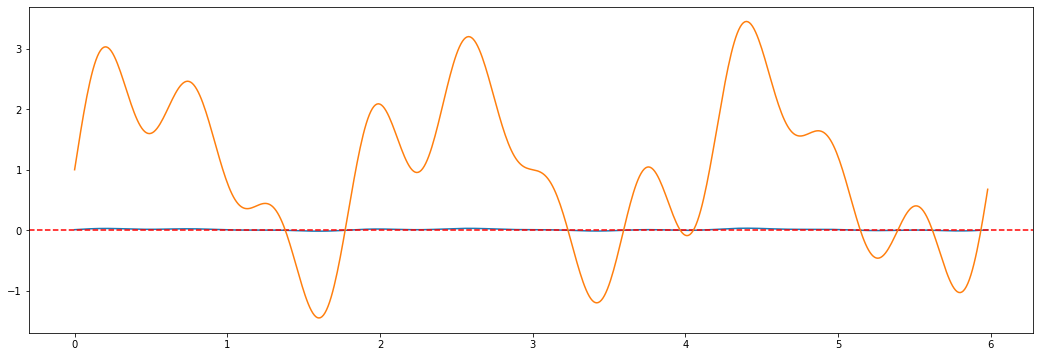

In [114]:
x_n = np.real(ifft(X_k)) / acq_freq  # TODO: why the scaling?
plt.figure(figsize=(18,6))
plt.plot(ts, x_n)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(ts, trajectory); # compare with original

A decreasing signal:

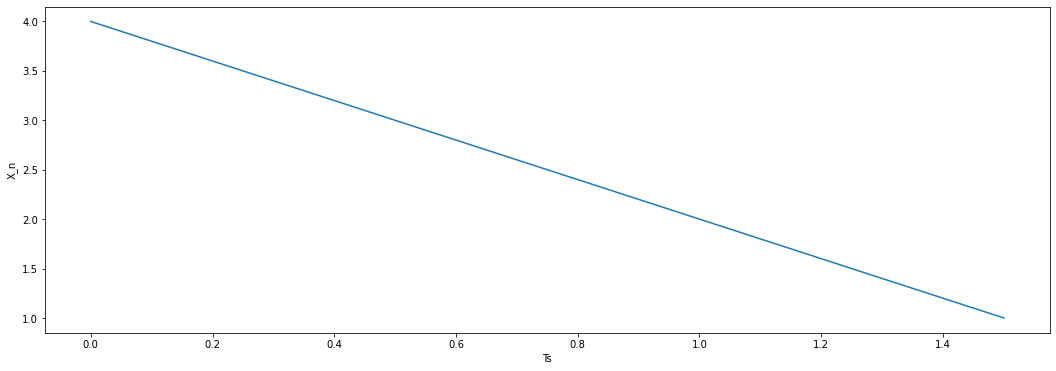

In [115]:
def plot_show1(trajectory, time=1, harmonics=[-1], plot_freq=False):
    acq_freq = len(trajectory)/time
    ts = np.arange(0, time, 1 / acq_freq)
    X_k = fft(trajectory)
    x_n = np.real(ifft(X_k)) / acq_freq
    if plot_freq:
        plot_frequency_spectra(X_k)
    max_y = np.ceil(1.5 * np.max(np.abs(x_n)))
    if harmonics[0] == -1:
        min_y = np.floor(np.min(np.abs(x_n))) - 1
    else:
        min_y = np.ceil(-1.5 * np.max(np.abs(x_n)))
    plt.plot(ts, trajectory)
    plt.xlabel('Ts')
    plt.ylabel('X_n')
    if harmonics[0] > -1:
        for i in range(0, len(harmonics)):
            plot_harmonic(X_k, harmonics[i], ts, acq_freq, color=i + 1)
    plt.show()
# plot_show(trajectory, time=1, harmonics=[-1], plot_freq=True)
trajectory = np.arange(4, 0, -1)
plt.figure(figsize=(18,6))
plot_show1(trajectory, time=2)

A staircase signal:

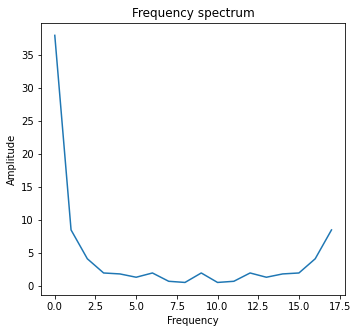

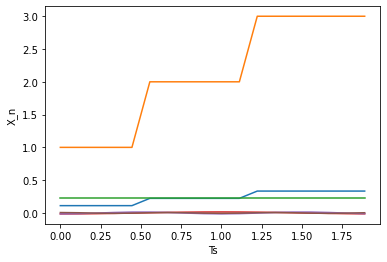

In [116]:
trajectory = np.concatenate((np.ones(5), 2 * np.ones(6), 3 * np.ones(7)))
plot_show(trajectory, time=2, harmonics=[0, 1, 2, 3], plot_freq=True)

redo above

Assume this time-series with a strong noise component:

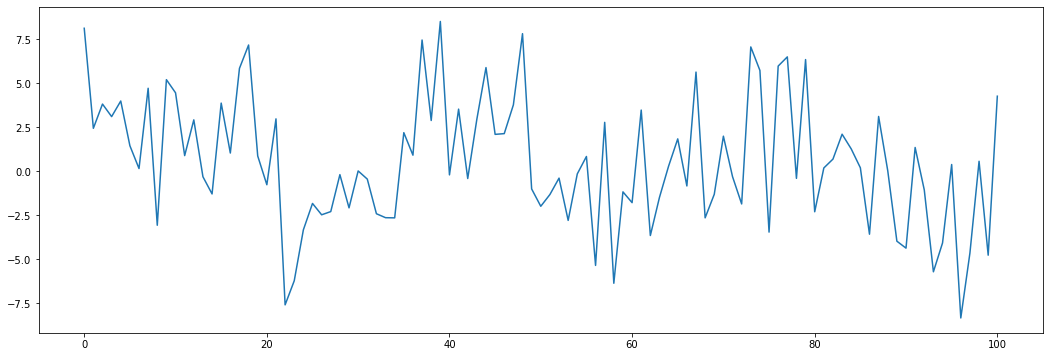

In [117]:
np.random.seed(101)
acq_freq = 101
time = 1
w = 2 * np.pi / time
ts = np.arange(0, time, 1 / acq_freq)
trajectory = 3 * np.random.randn(101) + 3 * np.sin(3 * w * ts)
plt.figure(figsize=(18,6))
plt.plot(trajectory);

We can check if there’s some harmonic hidden in it (there is one, 3Hz harmonics):

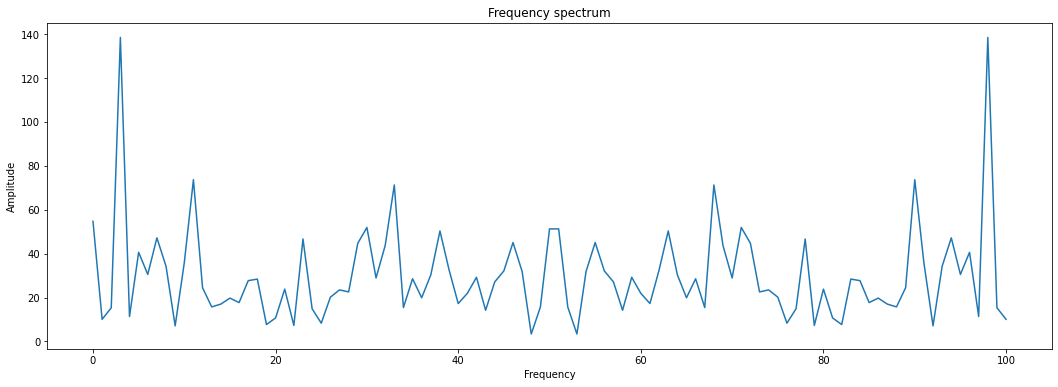

In [118]:
def plot_frequency_spectra1(X_k, xlimits=None):
    plt.figure(figsize=(18,6))
#     plt.subplot(121)
    plt.plot(np.abs(X_k))
    plt.title('Frequency spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
#     plt.subplot(122)
#     plt.plot(np.abs(X_k))
    plt.title('Frequency spectrum')
#     plt.xlabel('Frequency')
#     plt.ylabel('Amplitude')
#     if xlimits is not None:
#         plt.xlim(xlimits[0], xlimits[1])
    plt.show()
X_k = fft(trajectory)
plot_frequency_spectra1(X_k, xlimits=[0, acq_freq / 2])

And we find a peak at the 3 Hz harmonics, as expected!

There are several R libraries (surprise!) that produce this type of frequency plots. Here’s one eg (the results are not exactly the same, which might be the consequence of slightly different algorithms…):

In [119]:
from scipy import signal

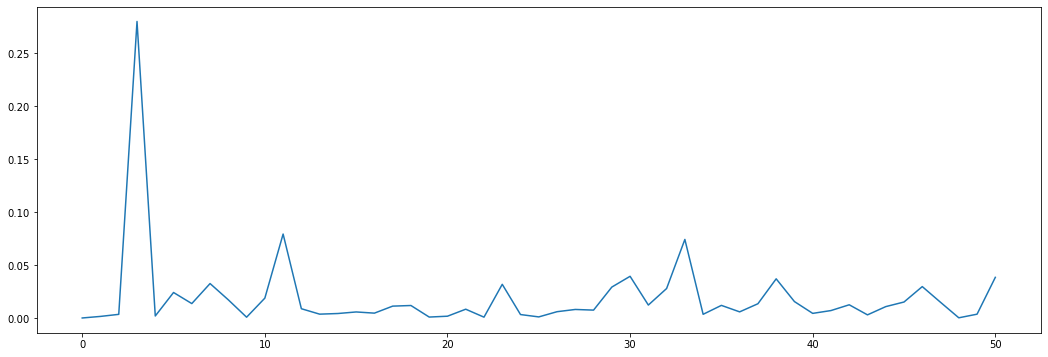

In [120]:
f_data = signal.periodogram(trajectory)
harmonics = np.arange(1, acq_freq / 2)
plt.figure(figsize=(18,6))
plt.plot(f_data[0] * len(trajectory), np.divide(f_data[1] , sum(f_data[1])));

And we find a peak at the 3 Hz harmonics, as expected!

If there is a trend in the time series, it should be detrended.

Eg:

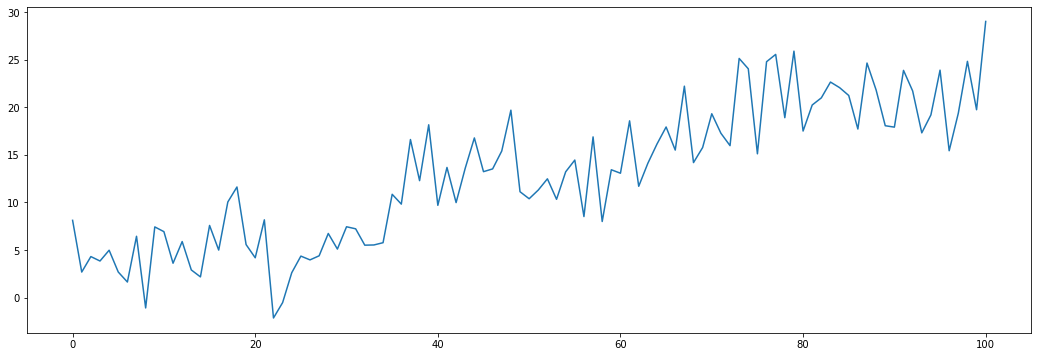

In [121]:
trajectory1 = trajectory + 25 * ts # let's create a linear trend
plt.figure(figsize=(18,6))
plt.plot(trajectory1);

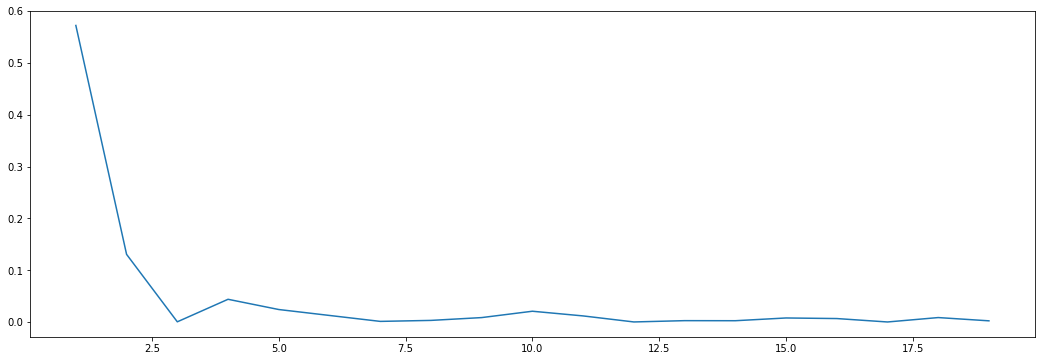

In [122]:
f_data = signal.periodogram(trajectory1)
harmonics = np.arange(1, 20)
plt.figure(figsize=(18,6))
plt.plot(f_data[0][harmonics] * len(trajectory1), f_data[1][harmonics] / sum(f_data[1]));

The trended time-series didn’t capture the signal.

Let’s detrended it know, ie, find the linear trend and work with the residuals:

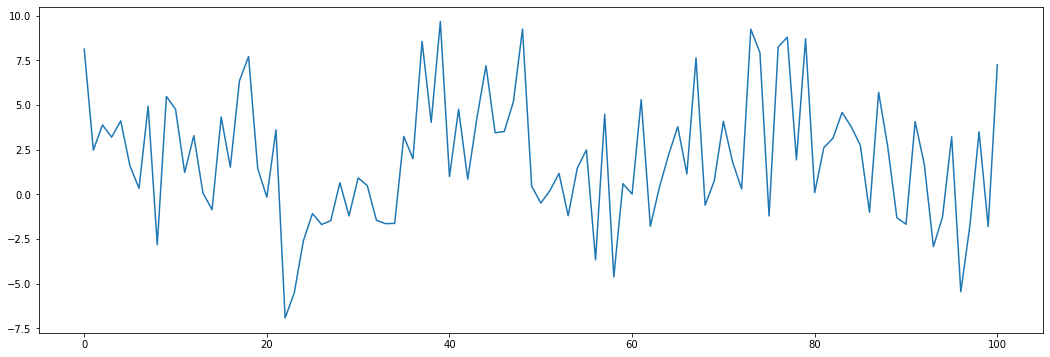

In [123]:
trend = np.polyfit(ts, trajectory1, 1)
detrended_trajectory = trajectory1 - trend[0] * ts
plt.figure(figsize=(18,6))
plt.plot(detrended_trajectory)

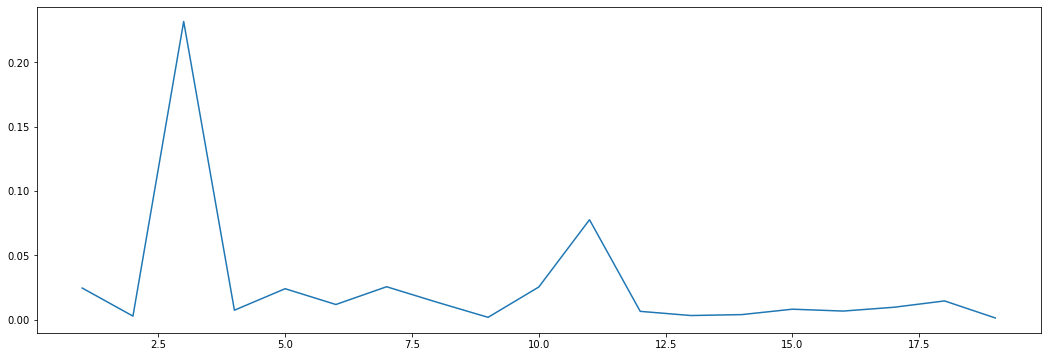

In [124]:
f_data = signal.periodogram(detrended_trajectory)
harmonics = np.arange(1, 20)
plt.figure(figsize=(18,6))
plt.plot(f_data[0][harmonics] * len(detrended_trajectory), f_data[1][harmonics] / sum(f_data[1]));

Now the signal was caught!

Also, if we are trying to identify signals of n×F Hz frequencies, the time series length should be divisible by F, ie, we must do something like detrended.trajectory[-(1:(length(detrended.trajectory) %% F))].

In [125]:
prices = pd.read_csv(".//..//Datasets//retailgas.csv")       # weekly prices (1 Hz = 1 Week)
prices['Date']= pd.to_datetime(prices["Date"], format="%Y-%m-%d")
prices = prices.sort_values(by="Date", ascending=False)

In [126]:
prices.head()

Date  Price
0 2012-10-15  3.819
1 2012-10-08  3.850
2 2012-10-01  3.804
3 2012-09-24  3.826
4 2012-09-17  3.878

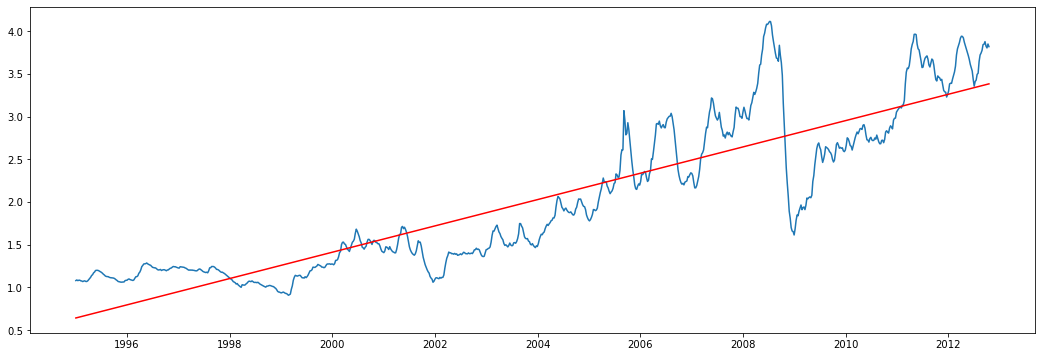

In [127]:
plt.figure(figsize=(18,6))
plt.plot(prices["Date"], prices["Price"])
trend = np.polyfit(prices.index, prices["Price"], 1)
plt.plot(prices["Date"], trend[0] * prices.index + trend[1], color="red");

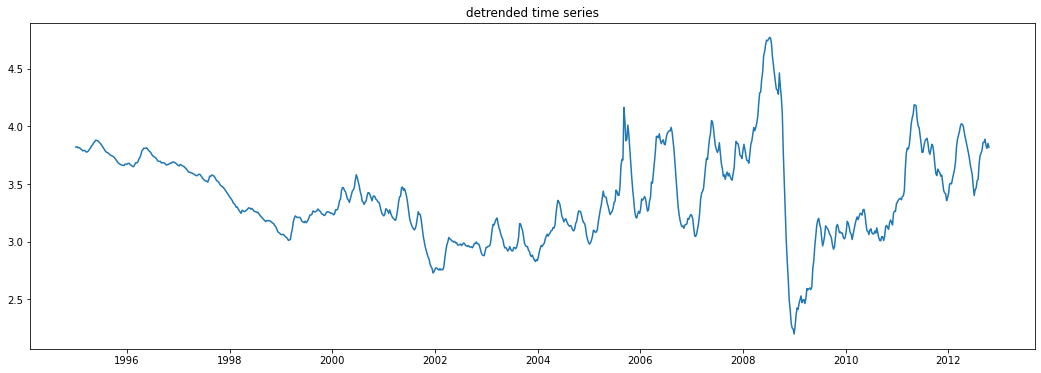

In [128]:
detrended_trajectory = prices["Price"] - trend[0] * prices.index
plt.figure(figsize=(18,6))
plt.plot(prices["Date"], detrended_trajectory)
plt.title("detrended time series");

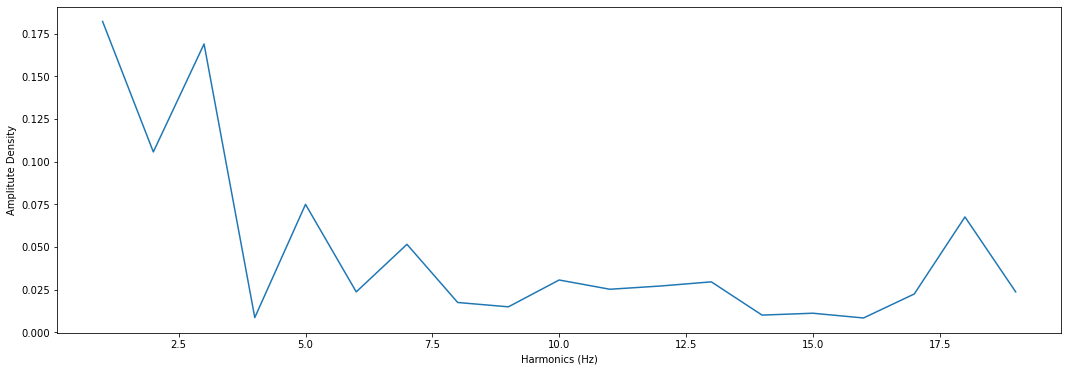

In [129]:
f_data = signal.periodogram(detrended_trajectory)
harmonics = np.arange(1, 20)
plt.figure(figsize=(18,6))
plt.plot(f_data[0][harmonics] * len(detrended_trajectory), f_data[1][harmonics] / sum(f_data[1]))
plt.xlabel("Harmonics (Hz)")
plt.ylabel("Amplitute Density");


And we are able to see that the stronger signals are the 1Hz, 2Hz and 3Hz which makes some sense. The wages have a monthly or two-week cycle that reflects on the first harmonics (1 Hz here corresponds to 1 week cycle, 2 Hz means every 2 weeks, etc.).

Examplify the role of the detrending step. Present different approaches of
detrending:

Detrending  removes any linear or nonlinear trends that may be present in the data. This is necessary because the Fourier Transform is designed to analyze the frequency content of a signal, and any trends in the data can interfere with this analysis. There are several different approaches to detrending that can be used, including:

    * Linear Detrending: This approach involves fitting a straight line to the data and subtracting it from the original signal. This can be done using a least squares method or other regression techniques.

    * Polynomial Detrending: This approach involves fitting a polynomial function to the data, such as a quadratic or cubic, and subtracting it from the original signal. This can be useful when the trend in the data is not linear.

    * Moving Average Detrending: This approach involves taking a moving average of the data and subtracting it from the original signal. This can be useful when the trend in the data is not linear and changes over time.

    * Difference Detrending: This method involves the subtraction of the current value from the past value.

    * Smooth Detrending: This method uses various forms of smoothing techniques like spline or low pass filter to remove the trend component.

    * Wavelet Detrending: This method uses wavelet transformation to remove the trend component.

The choice of which method to use will depend on the specific characteristics of the data and the research question being addressed.

##  4.2 Fast Fourier Transform Forecasting Model (FFT) with Darts

In [1]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally

fix_pythonpath_if_working_locally()

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae
from darts.utils.missing_values import fill_missing_values
from darts.datasets import TemperatureDataset, AirPassengersDataset, EnergyDataset

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

Importing plotly failed. Interactive plots will not work.


## Read and format
Here we simply read the CSV file containing daily temperatures, and transform the values into the desired format.

In [3]:
ts = TemperatureDataset().load()

## Constructing `TimeSeries` instances for training and validation

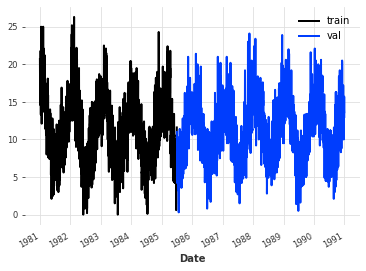

In [4]:
train, val = ts.split_after(pd.Timestamp("19850701"))
train.plot(label="train")
val.plot(label="val")

## Basic FFT model

In [5]:
model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(val))

The plot below shows us that a simple DFT with a random train-test split will most likely lead to bad results. Upon closer inspection we can see that the prediction (in purple) simply repeats the training set (blue). This is the standard behavior of the DFT, and by itself it is quite useless, since repeating our training set could be done much more efficiently. Three improvements were made to this approach.

MAE: 5.424526892430279


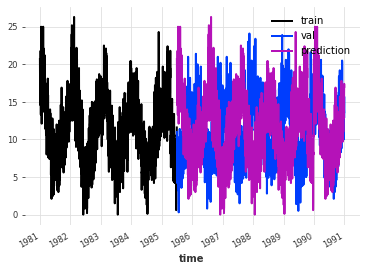

In [6]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")
print("MAE:", mae(pred_val, val))

## Improvement 1: Crop the training set
The first improvement consists of cropping the training set before feeding it to the FFT algorithm such that the first timestamp in the cropped series matches the first timestamp to be predicted in terms of seasonality, i.e. it has the same month, day, weekday, time of day, etc. We could achieve this by passing the optional argument `required_matches` to the FFT constructor that explicitly tells our model which timestamp attributes are relevant. But actually, if we don't set it manually, the model will attempt to automatically find the pd.Timestamp attributes that are relevant and crop the training set accordingly (which we will do here).

In [7]:
model = FFT(nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(val))

We can see that the results look like the seasonality of the predictions nicely aligns with the seasonality of the validation set. However, we are still just repeating the training set, including all of the noise. Looking at the error we can see that this is still a pretty bad forecast.

MAE: 3.0995766932270916


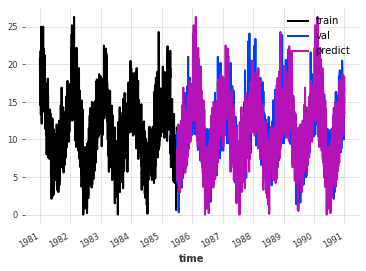

In [8]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="predict")
print("MAE:", mae(pred_val, val))

## Improvement 2: Filtering out low-amplitude waves
The decomposition of the DFT into the frequency domain allows us to selectively filter out waves with low amplitudes. This allows us to keep strong seasonal trends while discarding some noise. This is achieved in the FFT model by passing the optional argument `nr_freqs_to_keep`. This argument represents the total number of frequencies that will be kept. For instance, if a value of 20 is passed, only the 20 frequencies with the highest amplitudes will be utilized. The default value is set to 10.

In [9]:
model = FFT(nr_freqs_to_keep=20)
model.fit(train)
pred_val = model.predict(len(val))

We get a signal that is less noisy. Depending on the data set, this might be a better forecast. Looking at the error metric, we can see that this model performs significantly better than the previous models.

MAE: 2.2941917142812893


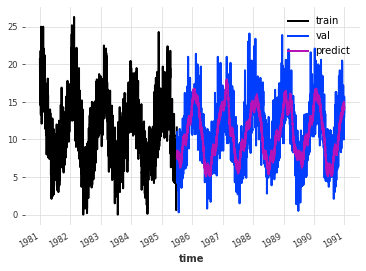

In [10]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="predict")
print("MAE:", mae(pred_val, val))

## Improvement 3: Detrending
Let's try out a different data set that has a global upward trend

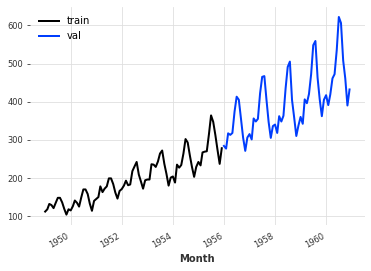

In [11]:
ts_2 = AirPassengersDataset().load()
train, val = ts_2.split_after(pd.Timestamp("19551201"))
train.plot(label="train")
val.plot(label="val")

In [12]:
model = FFT()
model.fit(train)
pred_val = model.predict(len(val))

Clearly, our model fails completely at incorporating the upward trend. Due to the trend, our model also fails to recognize the monthly seasonality.

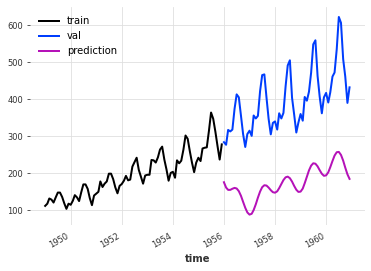

In [13]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")

This problem can be solved by setting the optional trend argument to either 'poly' or 'exp', which fits a polynomial or exponential funtion to the data and subtracts it before moving on to DFT. When predicting, the trend is added again.

In [14]:
model = FFT(trend="poly")
model.fit(train)
pred_val = model.predict(len(val))

We have a much better prediction now.

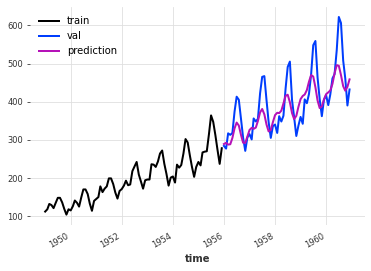

In [15]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")

## New Data: Hourly Nuclear Energy Generation

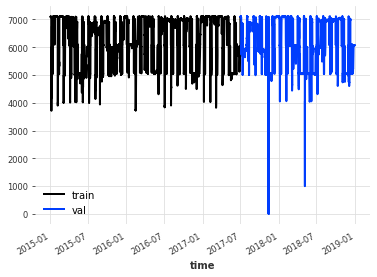

In [16]:
ts_3 = EnergyDataset().load()
ts_3 = fill_missing_values(ts_3, "auto")
ts_3 = ts_3["generation nuclear"]
train, val = ts_3.split_after(pd.Timestamp("2017-07-01"))
train.plot(label="train")
val.plot(label="val")

Instead of simply looking at the performance of the FFT model, we can also look at how a bunch of other forecasting models performs on this new data set in terms of MAE. Surprisingly, on this dataset, the FFT model outperforms all of the others (at least with their default parameters). Granted, this dataset was specifically chosen because of its highly seasonal nature. However, this shows us that there are use cases for FFT. Furthermore, the FFT model has a much shorter running time than the other models!

In [17]:
models = [AutoARIMA(), ExponentialSmoothing(), Theta(), FFT()]

for model in models:
    model.fit(train)
    pred_val = model.predict(len(val))
    print(str(model) + " MAE: " + str(mae(pred_val, val)))

Auto-ARIMA MAE: 956.1953089418552
Prophet MAE: 653.8682864837639
Exponential smoothing MAE: 1667.805755244887
Theta(2) MAE: 944.0038491197353
FFT(nr_freqs_to_keep=10, trend=None) MAE: 643.337489093281


# 5. From motif to discord detection

Explain in 150 to 250 words what computing the matrix profile means. How
does it work ?

Matrix profile is a data structure and associated algorithms that helps solve the dual problem of
discord detection and motif discovery, where motifs are the repeated patterns in a time series and
discords are the anomalies.
MP’s two main components are a distance profile and profile index. The distance profile is a vector
of minimum Z-Normalized Euclidean Distances. The profile index contains locations of its most
similar sub-sequence.
A sliding window approach is followed to compute MP. with a window size m, the algorithm
computes the distances for the windowed sub-sequence against the entire time series, sets an
exclusion zone to ignore trivial matches, updates the distance profile with the minimal values, then
sets the first nearest-neighbor index. The distance calculations outlined above occur n-m + 1 time,
where n is the length of the time series. For the algorithm not to catch trivial matches, an exclusion
zone of length m/2 is mandatory to prevent trivial matches, and is placed before and after the
current window. The second window slides across the time series computing the dot product for
each sub-sequence, and once all of the dot products are computed, the exclusion zone is applied to
the distances and the minimum distance is stored in the Matrix Profile.


## 5.1 Motif detection

What are the main parameters that you can play with during the motif detection phase ? What happens when you change their value ?

There are several main parameters that can be adjusted during the motif detection phase. These include:

    * The window size: This parameter controls the length of the subsequences that are used to compute the matrix profile. Increasing the window size will result in longer motifs being detected, but it will also increase the computational cost of the algorithm.

    *The distance metric: This parameter controls the way in which the similarity between subsequences is measured. Different distance metrics, such as Euclidean distance or dynamic time warping, can be used depending on the characteristics of the data. Changing the distance metric can affect the type of motifs that are detected.

    *The exclusion zone: This parameter controls the minimum distance between detected motifs. Increasing the exclusion zone will result in fewer, but more distinct, motifs being detected.

    *The number of motifs: This parameter controls the number of motifs that are returned by the algorithm. Increasing the number of motifs will result in more motifs being detected, but it may also result in lower-quality motifs.

    *The threshold : This parameter is used to filter out the motifs based on the matrix profile value. Changing the threshold will affect the number of motifs returned and the quality of motifs.

Changing the values of these parameters can affect the number, quality, and characteristics of the motifs that are detected. It is important to experiment with different parameter settings and evaluate the results in order to determine the optimal settings for a given dataset.





Imagine applications of motif detection in 5 different activity sectors (health, etc.)

* Health: Motif detection can be used in the health sector to identify patterns in medical data, such as electrocardiograms (ECGs) or gene sequences. For example, it can be used to identify common patterns in ECGs that are associated with specific heart conditions, or to identify recurring sequences of genetic mutations that are associated with certain diseases. This can help doctors and researchers to better understand the underlying causes of these conditions, and to develop more effective treatments.

* Finance: Motif detection can be used in the finance sector to identify patterns in stock prices or trading data. For example, it can be used to identify recurring patterns of buying and selling activity that are associated with market trends, or to identify common patterns of stock price movements that are associated with specific companies or sectors. This can help traders and investors to make more informed decisions, and to identify potential opportunities for profit.

* Energy: Motif detection can be used in the energy sector to identify patterns in energy consumption or production data. For example, it can be used to identify recurring patterns of energy usage that are associated with specific times of day or specific weather conditions, or to identify common patterns of energy production that are associated with different types of renewable energy sources. This can help energy companies and policymakers to better understand energy usage patterns and to develop more efficient and sustainable energy systems.

* Manufacturing: Motif detection can be used in the manufacturing sector to identify patterns in production data, such as machine data from different plants and process data from different machines. This can help to identify patterns and anomalies that indicate a production problem and can help to improve the overall efficiency of the manufacturing process.

* Cybersecurity: Motif detection can be used in the cybersecurity sector to identify patterns in network and system data that indicate potential security threats. For example, it can be used to identify recurring patterns of network activity that are associated with specific types of cyber attacks, or to identify common patterns of system behavior that are associated with malware or other malicious software. This can help security professionals to better understand and defend against cyber threats.

In all of these sectors, Motif detection can provide valuable insights that can help to improve performance, efficiency, and security. The ability to identify and understand patterns in large and complex data sets can help organizations to make more informed decisions, to identify opportunities for innovation, and to mitigate risks.

using matrixprofile library

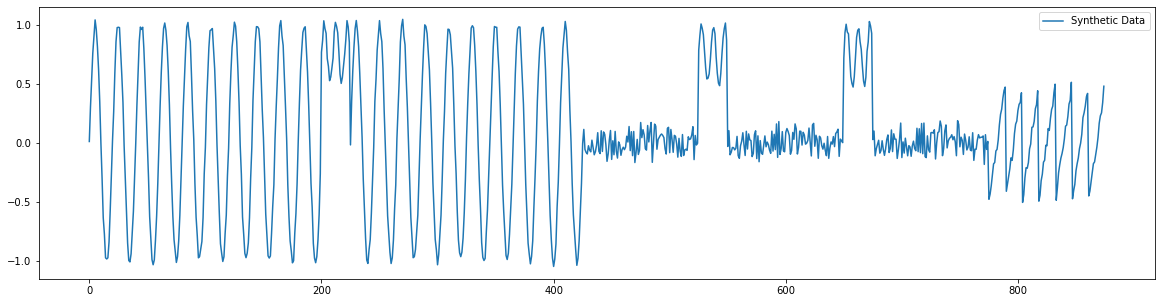

In [15]:
data = pd.read_csv('.//..//Datasets//rawdata.csv')
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

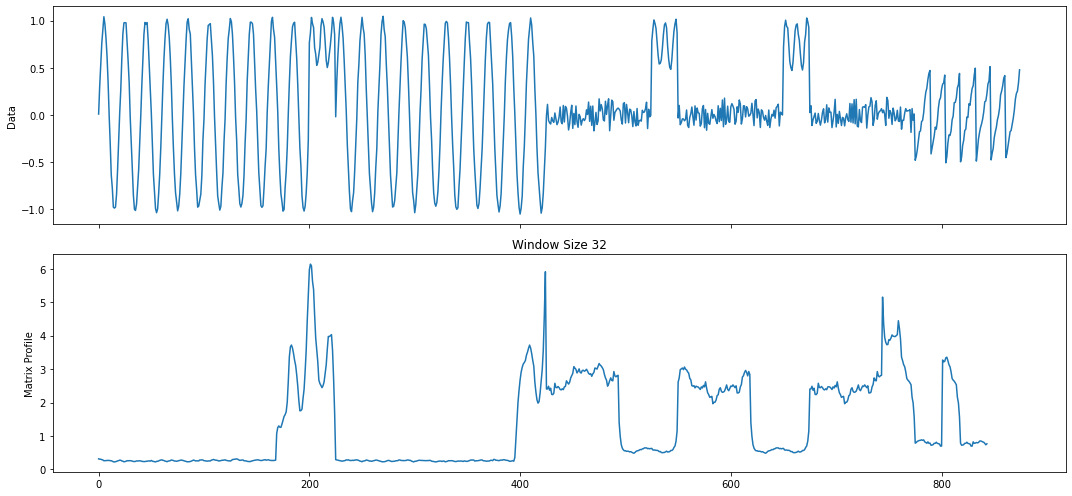

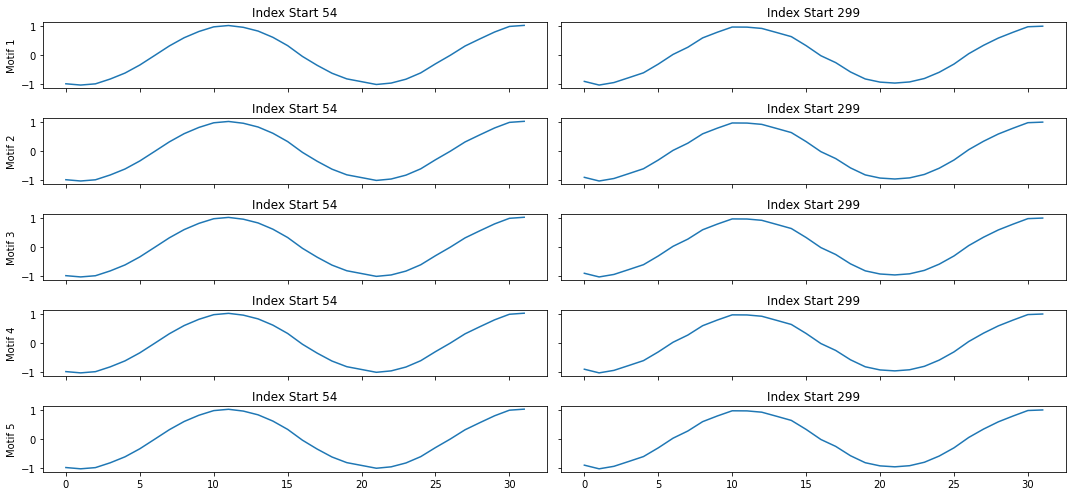

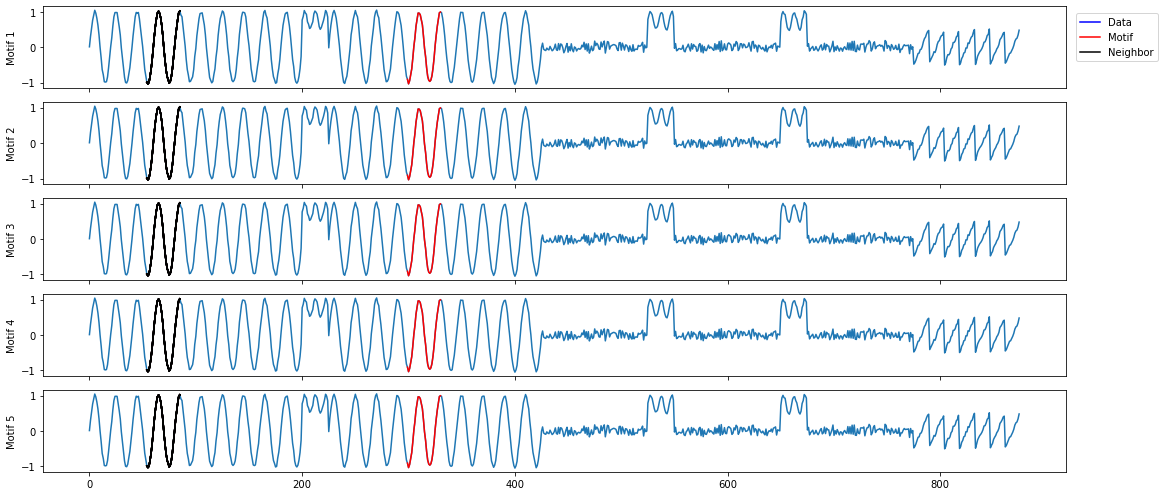

In [18]:
# from matrixprofile import *
window_size = 32
profile = mp.compute(pattern, windows=window_size)
profile = mp.discover.motifs(profile, k=5)
mp.visualize(profile)
plt.show()

using matrixprofile-ts

In [21]:
m=32
mp = matrixProfile.stomp(pattern,m)
def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(pattern)-1) for s in starts]
        ax.plot(starts, pattern[starts],  c +'o',  label=l)
        ax.plot(ends, pattern[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),pattern[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(pattern, 'k', linewidth=1, label="data")
    ax.legend()

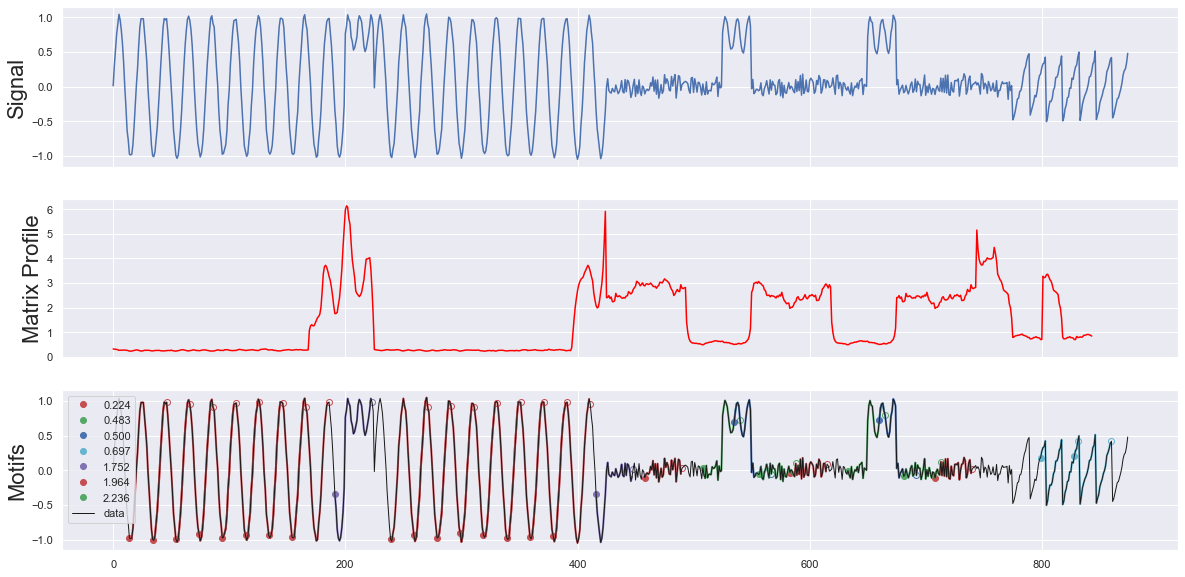

In [22]:
mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=10)
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Motifs', size=22)
#plt.xlim((0,100))
plt.show()

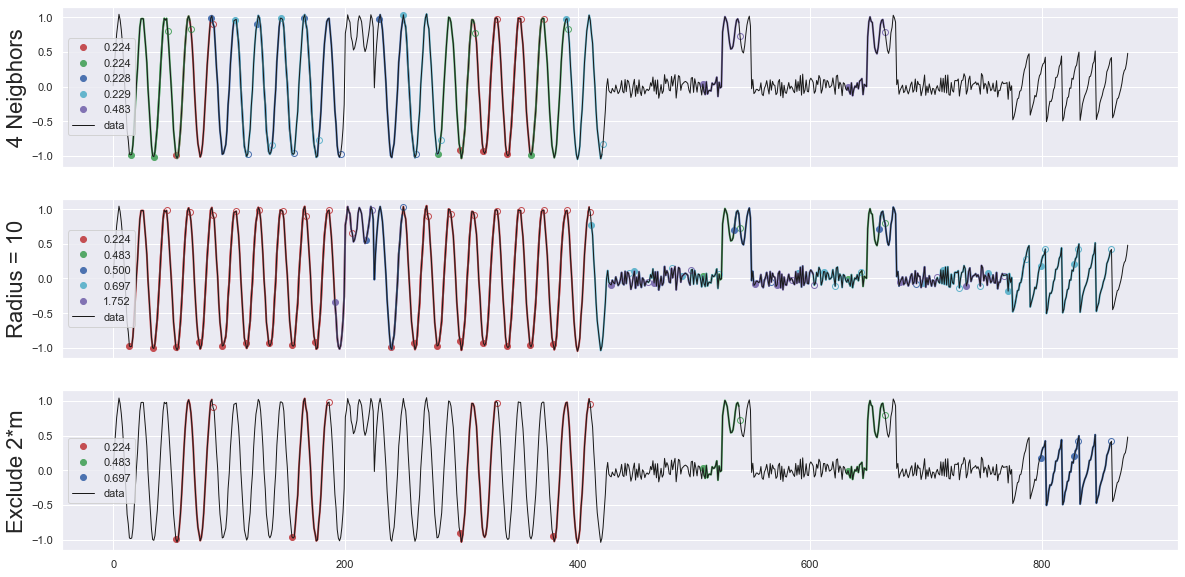

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))


mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, n_neighbors=4)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax1)
ax1.set_ylabel('4 Neigbhors', size=22)

mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, radius=10)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax2)
ax2.set_ylabel('Radius = 10', size=22)

mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, ex_zone=2*m)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Exclude 2*m', size=22)
plt.show()

## 5.2 Discord detection


In [6]:
dataset = mp.datasets.load('nyc-taxi-anomalies.csv')

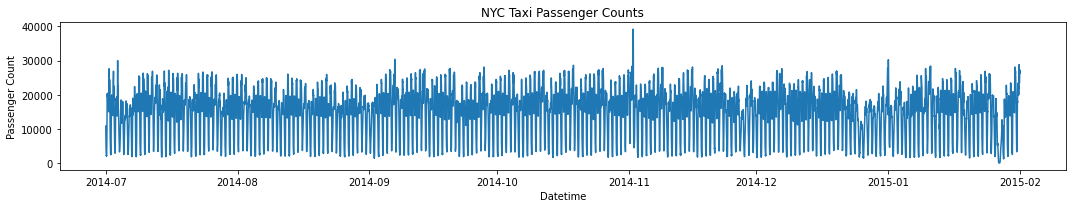

In [7]:
# visualize the raw data t
plt.figure(figsize=(15,3))
plt.plot(dataset['datetime'], dataset['data'])
plt.title('NYC Taxi Passenger Counts')
plt.ylabel('Passenger Count')
plt.xlabel('Datetime')
plt.tight_layout()
plt.show()

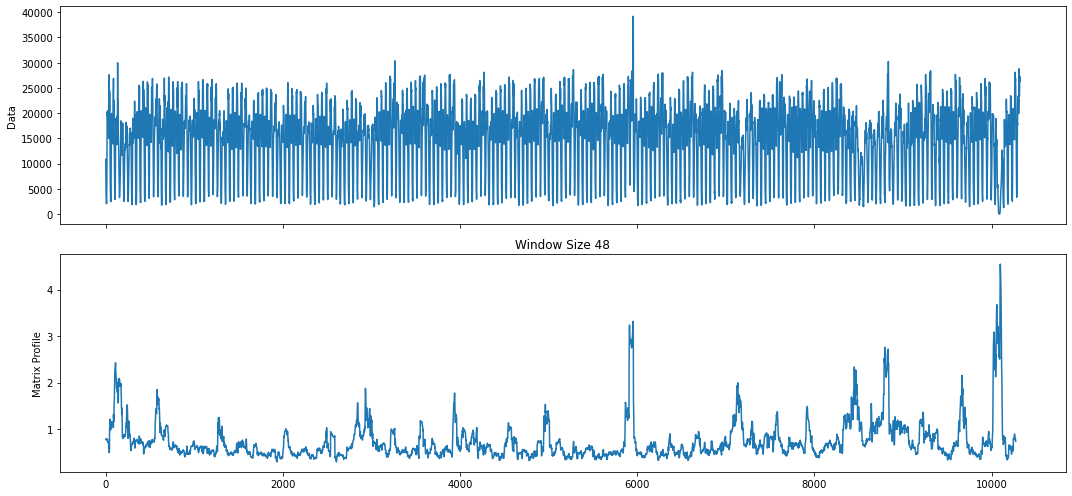

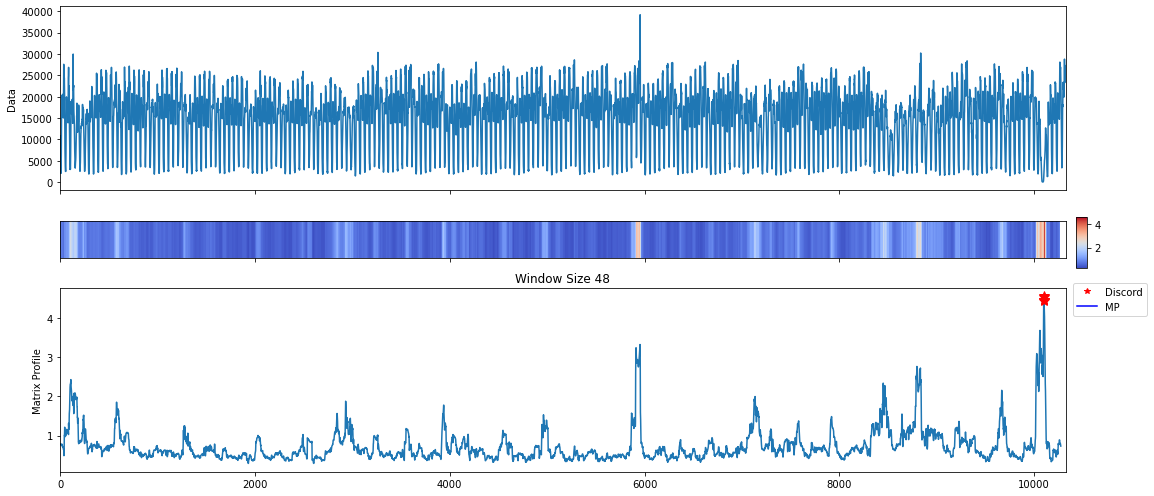

In [8]:
# discord detection without the exclusion zone

# defining window size
window_size = 48
profile = mp.compute(dataset['data'], windows=window_size)
#setting number discords number to the 5 as there are 5known anomalies
profile = mp.discover.discords(profile, k=5)
mp.visualize(profile)
plt.show()

In [9]:
for dt in dataset['datetime'][profile['discords']]:
    print(dt)

2015-01-27T09:00:00
2015-01-27T08:30:00
2015-01-27T08:00:00
2015-01-27T09:30:00
2015-01-27T10:00:00


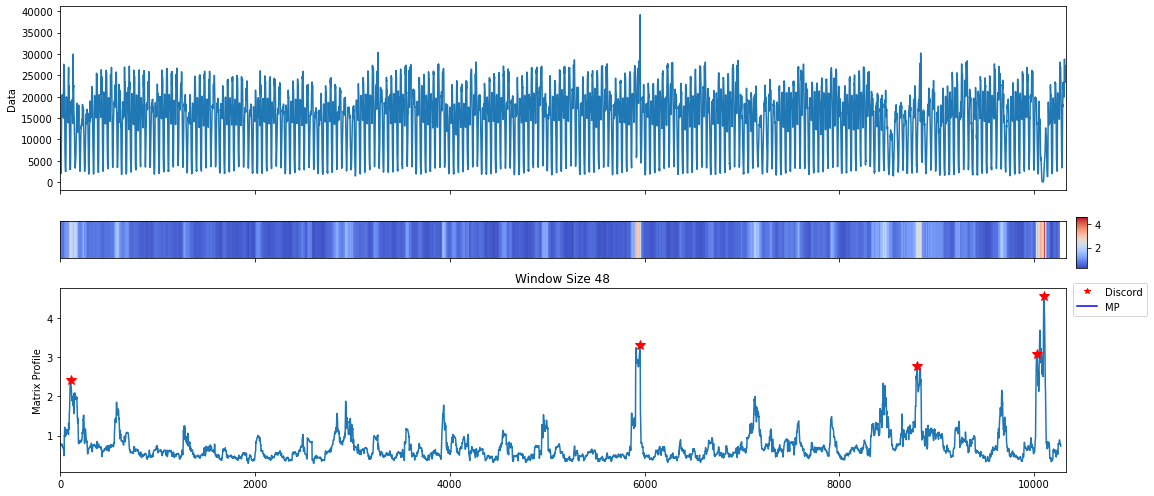

In [10]:
# discord detection with the exclusion zone
profile = mp.discover.discords(profile, exclusion_zone=window_size, k=5)
plot_discords_mp(profile)
plt.show()

In [11]:
for dt in dataset['datetime'][profile['discords']]:
    print(dt)

2015-01-27T09:00:00
2014-11-02T00:30:00
2015-01-25T20:30:00
2014-12-31T05:30:00
2014-07-03T07:00:00


Using the newly defined exclusion zone we are able to identify the days corresponding to the anomalous events, It is important to note that the window size and exclusion zone must be set correctly to find what you are interested in. For example, I could be interested in anomalous days within a week period. In this case I would simply increase the exclusion zone to roughly 3 days. This is because the exclusion zone is based on before and after the discord.

## 5.3 Time series segmentation

In [11]:
# loading datasets
tssb = load_time_series_segmentation_datasets(names=["ArrowHead", "InlineSkate", "Plane"])

Time Series: ArrowHead: True Change Points: [753], Found Change Points: [750], Score: 0.001992


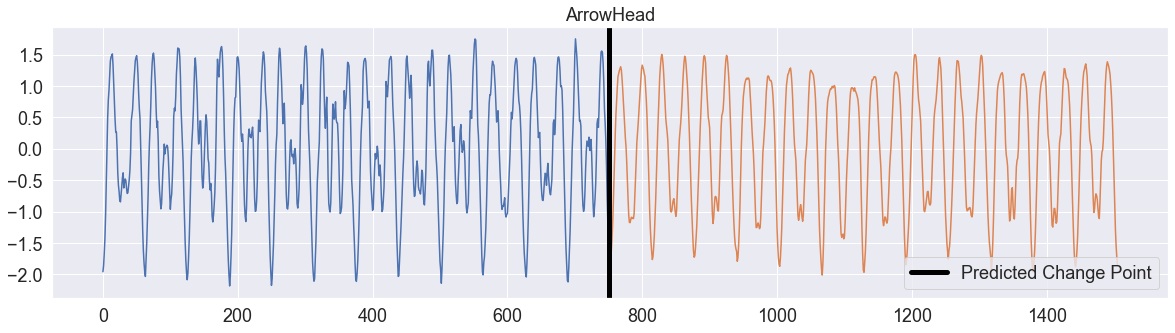

Time Series: InlineSkate: True Change Points: [1058 2704], Found Change Points: [978, 3089], Score: 0.048227


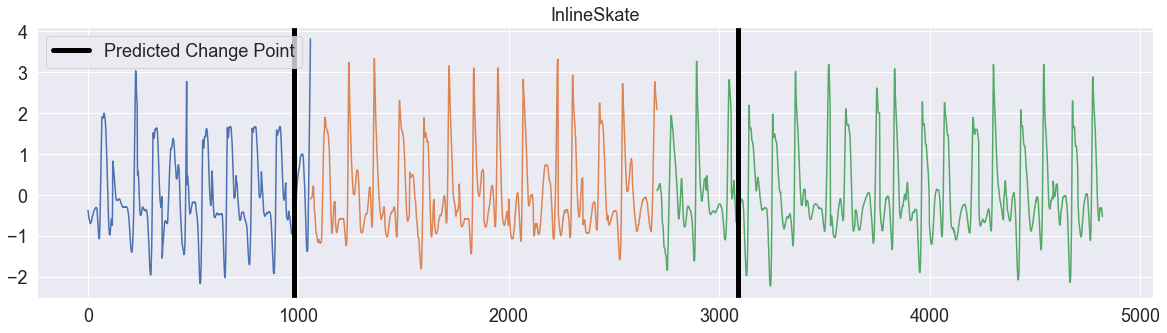

Time Series: Plane: True Change Points: [ 540 1044 1368 1944 2412 3060], Found Change Points: [2412, 3060, 1371, 1942, 1050, 535], Score: 0.000705


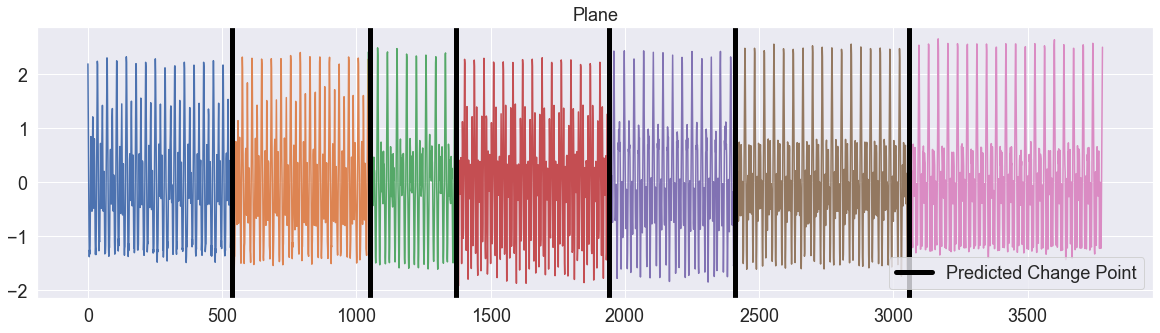

In [12]:
# Applying the clasp segmentation algorithm
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = ClaSPSegmentation(window_size, n_cps=len(cps)).fit_predict(ts)
    score = relative_change_point_distance(cps, found_cps, ts.shape[0])
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    fig, ax = visualize_time_series(ts, ts_name, cps, found_cps)
    plt.show()

Present some of the main applications of time series segmentation:

* Predictive maintenance: Time series segmentation can be used to identify patterns in sensor data that indicate when equipment or machinery is likely to fail. This can help organizations to schedule maintenance and repairs more efficiently, reducing downtime and costs.

* Customer behavior analysis: Time series segmentation can be used to identify patterns in customer data, such as purchase history or website usage. This can help organizations to better understand customer behavior and to develop more effective marketing and sales strategies.

* Traffic analysis: Time series segmentation can be used to identify patterns in traffic data, such as vehicle counts or travel times, to help improve traffic flow and reduce congestion.

* Environmental monitoring: Time series segmentation can be used to identify patterns in environmental data, such as temperature, humidity, and air quality, to help organizations to better understand and manage environmental impacts.

* Speech Recognition: Time series segmentation can be used to identify segments of speech in a speech signal, which can be used to improve the performance of speech recognition systems.

* Medical data analysis: Time series segmentation can be used to identify patterns in medical data, such as ECG signals and oxygen saturation levels, to help identify medical conditions and improve patient outcomes.

# 6. Recurrent Neural Networks Models

In [1]:
fix_pythonpath_if_working_locally()

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# Read data:
series = AirPassengersDataset().load()

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("19590101"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create month and year covariate series
year_series = datetime_attribute_timeseries(
    pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
    attribute="year",
    one_hot=False,
)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(
    year_series, attribute="month", one_hot=True
)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp("19590101"))

Let's train an LSTM neural net. For using vanilla RNN or GRU instead, replace `'LSTM'` by `'RNN'` or `'GRU'`, respectively.

In [5]:
my_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=300,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Air_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    save_checkpoints=True,
)

In what follows, we can just provide the whole `covariates` series as `future_covariates` argument to the model; the model will slice these covariates and use only what it needs in order to train on forecasting the target `train_transformed`:

In [6]:
my_model.fit(
    train_transformed,
    future_covariates=covariates,
    val_series=val_transformed,
    val_future_covariates=covariates,
    verbose=True,
)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Look at predictions on the validation set
Use the "current" model - i.e., the model at the end of the training procedure:

Predicting: 0it [00:00, ?it/s]

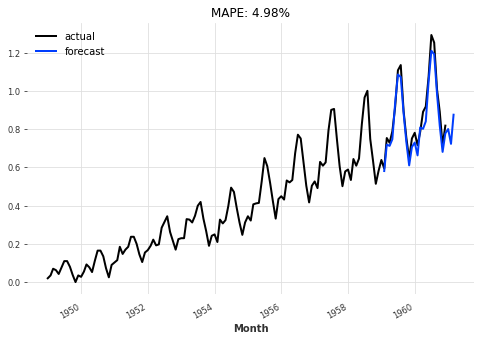

In [7]:
def eval_model(model):
    pred_series = model.predict(n=26, future_covariates=covariates)
    plt.figure(figsize=(8, 5))
    series_transformed.plot(label="actual")
    pred_series.plot(label="forecast")
    plt.title("MAPE: {:.2f}%".format(mape(pred_series, val_transformed)))
    plt.legend()


eval_model(my_model)

Use the best model obtained over training, according to validation loss:

Predicting: 0it [00:00, ?it/s]

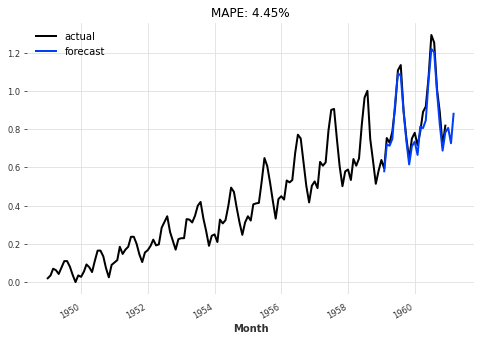

In [8]:
best_model = RNNModel.load_from_checkpoint(model_name="Air_RNN", best=True)
eval_model(best_model)

### Backtesting
Let's backtest our `RNN` model, to see how it performs at a forecast horizon of 6 months:

In [9]:
backtest_series = my_model.historical_forecasts(
    series_transformed,
    future_covariates=covariates,
    start=pd.Timestamp("19590101"),
    forecast_horizon=6,
    retrain=False,
    verbose=True,
)

  0%|          | 0/19 [00:00<?, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

MAPE: 2.71%


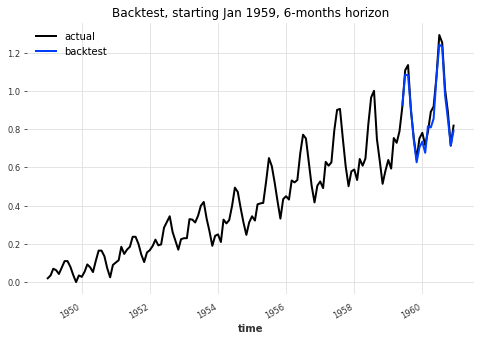

In [10]:
plt.figure(figsize=(8, 5))
series_transformed.plot(label="actual")
backtest_series.plot(label="backtest")
plt.legend()
plt.title("Backtest, starting Jan 1959, 6-months horizon")
print(
    "MAPE: {:.2f}%".format(
        mape(
            transformer.inverse_transform(series_transformed),
            transformer.inverse_transform(backtest_series),
        )
    )
)

## Monthly sunspots
Let's now try a more challenging time series; that of the monthly number of sunspots since 1749. First, we build the time series from the data, and check its periodicity.

(True, 125)

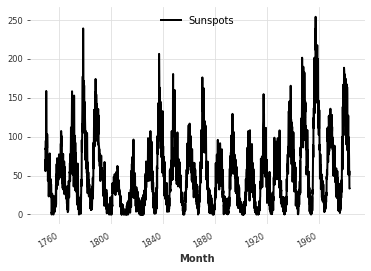

In [11]:
series_sunspot = SunspotsDataset().load()

series_sunspot.plot()
check_seasonality(series_sunspot, max_lag=240)

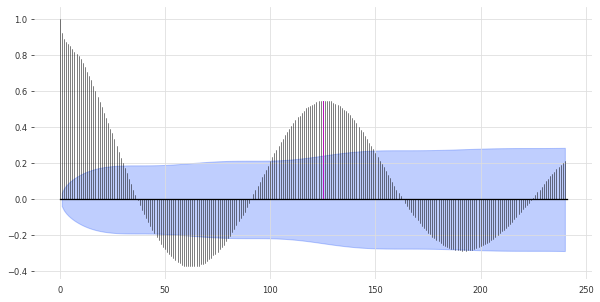

In [12]:
plot_acf(series_sunspot, 125, max_lag=240)  # ~11 years seasonality

In [13]:
train_sp, val_sp = series_sunspot.split_after(pd.Timestamp("19401001"))

transformer_sunspot = Scaler()
train_sp_transformed = transformer_sunspot.fit_transform(train_sp)
val_sp_transformed = transformer_sunspot.transform(val_sp)
series_sp_transformed = transformer_sunspot.transform(series_sunspot)

In [14]:
my_model_sun = BlockRNNModel(
    model="GRU",
    input_chunk_length=125,
    output_chunk_length=36,
    hidden_dim=10,
    n_rnn_layers=1,
    batch_size=32,
    n_epochs=100,
    dropout=0.1,
    model_name="sun_GRU",
    nr_epochs_val_period=1,
    optimizer_kwargs={"lr": 1e-3},
    log_tensorboard=True,
    random_state=42,
    force_reset=True,
)

my_model_sun.fit(train_sp_transformed, val_series=val_sp_transformed, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

To evaluate our model, we will simulate historic forecasting with a forecasting horizon of 3 years across the validation set. To speed things up, we will only look at every 10th forecast. For the sake of comparison, let's also fit an exponential smoothing model.

In [15]:
# Compute the backtest predictions with the two models
pred_series = my_model_sun.historical_forecasts(
    series_sp_transformed,
    start=pd.Timestamp("19401001"),
    forecast_horizon=36,
    stride=10,
    retrain=False,
    last_points_only=True,
    verbose=True,
)

pred_series_ets = ExponentialSmoothing(seasonal_periods=120).historical_forecasts(
    series_sp_transformed,
    start=pd.Timestamp("19401001"),
    forecast_horizon=36,
    stride=10,
    retrain=True,
    last_points_only=True,
    verbose=True,
)

  0%|          | 0/49 [00:00<?, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

RNN MAPE: 73.19010018398568
ETS MAPE: 116.63584309419007


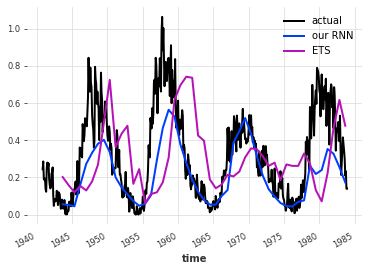

In [16]:
val_sp_transformed.plot(label="actual")
pred_series.plot(label="our RNN")
pred_series_ets.plot(label="ETS")
plt.legend()
print("RNN MAPE:", mape(pred_series, val_sp_transformed))
print("ETS MAPE:", mape(pred_series_ets, val_sp_transformed))

## 6.2 Exponential Smoothing in Darts

In [ ]:
# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [ ]:
# applying exponential smoothing to the ts
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

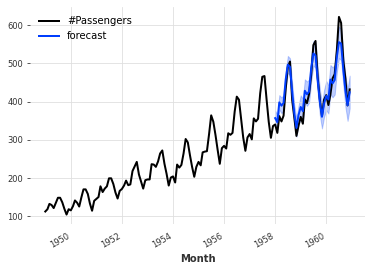

In [ ]:
# plotting the series and the forecast
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
# splitting the data into training and testing sets
series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [ ]:
# instializing a K-means scorer
scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [ ]:
detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

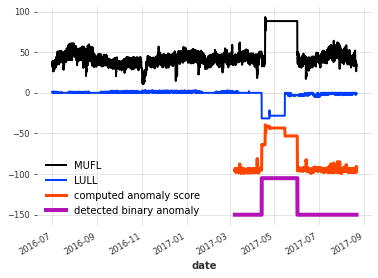

In [ ]:
series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

How do Exponential smoothing and RNNs work ?

Exponential smoothing is a time series forecasting method that uses a weighted average of past observations to predict future points. The weight applied to the most recent observation decreases exponentially as the observation gets older, hence the name "exponential smoothing." This method is useful for forecasting data with a trend or seasonality.

A Recurrent Neural Network (RNN) is a type of neural network that is particularly well-suited for sequential data such as time series. RNNs can process input sequences of any length, and maintain an internal "memory" of previous inputs. They use this memory to make predictions about future points in the sequence. RNNs are often used in natural language processing, speech recognition, and other applications that involve sequential data.

While both methods are used for time series forecasting, they are quite different in their approach and the type of problem they are best suited for. Exponential smoothing is a simple model and is generally easier to interpret. While RNNs are often more powerful and can handle more complex patterns in the data, they can be difficult to interpret, and have a higher computational cost.